In [ ]:
import os
import json
import pandas as pd

#**Feature extraction**

##Collecting \#followers, \#friends and \#statuses of each user from user_profiles

In [ ]:
directory = "/content/drive/MyDrive/FakeNewDet-FYP/code/fakenewsnet_dataset/user_profiles"
user_id = []
followers_count = []
friends_count = []
statuses_count = []

for file in os.listdir(directory):
  json_path=str(directory)+"/"+str(file)
  f=open(json_path)
  # print(json_path)
  data = json.load(f)
  # print(data)
  user_id.append(data['id'])
  followers_count.append(data['followers_count'])
  friends_count.append(data['friends_count'])
  statuses_count.append(data['statuses_count'])

In [ ]:
import pandas as pd

df = pd.DataFrame()
df['user_id'] = user_id
df['followers_count'] = followers_count
df['friends_count'] = friends_count
df['statuses_count'] = statuses_count
df

,user_id,followers_count,friends_count,statuses_count
0,2208282419,89,985,14582
1,16439096,188,452,10746
2,2443753278,206,430,36804
3,1443493669,99,55,565
4,335615811,168,706,1029
...,...,...,...,...
3256,3214688747,50,136,10242
3257,148169194,82,25,745
3258,799250105572491264,62461,14208,36852
3259,371286510,1623,2375,12922


In [ ]:
df.to_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/userIdsFollowersFriendsStatuses.csv')

##classifying the user ids into those "interacted with fake" and "interacted with real" news events based on politifact folder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/userIdsFollowersFriendsStatuses.csv')
user_id = df['user_id'].tolist()

In [ ]:
# collecting user ids related to fake articles
f_fake = open('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/useridsforeachfakearticle.json',) 
data_fake = json.load(f_fake)

# collecting all the values ie, userIds of each fake article into a single list
user_id_fake = []
for i in data_fake:
  user_id_fake = list(set(user_id_fake) | set(data_fake[i]))

print("user_id_fake: ", user_id_fake, "\nlength: ", len(user_id_fake))

# separating out the user ids corresponding to fake articles from the entire user ids list
temp_fake = set(user_id_fake) 
F_userIds = [value for value in user_id if value in temp_fake]

print("\nF_userIds: ", F_userIds, "\nlength: ", len(F_userIds))


user_id_fake:  [838225012662362112, 995027141803769857, 746412995903791105, 906225484861767680, 767621685822513153, 1013474576251092993, 900870989105463298, 764545629439664128, 711228711773675520, 782753466406019072, 913151494559604746, 727800899813449732, 816121734344622086, 762753709172482052, 3071844357, 1009547219308109830, 429555728, 4068483082, 41213961, 871360492995870722, 108232726, 220323863, 197640217, 4214136858, 18227229, 14778397, 2497093667, 836943908, 108789800, 78962736, 170950708, 219463734, 20537400, 14327866, 2869919802, 216997948, 248029247, 4323278913, 600088645, 196599882, 40992849, 142032980, 2710634580, 1450672226, 230006882, 217137252, 52256871, 508092522, 3428294764, 406601837, 17539187, 28270707, 582557814, 1249099898, 16285818, 2881626239, 825518870421180416, 2156798082, 833742731952394240, 199172228, 776952165575299072, 850149510, 500842631, 787521589936001024, 802054926994116608, 759358922788573184, 236748939, 105799821, 423780498, 124616850, 2659475605, 4

In [ ]:
# collecting user ids related to true articles
f_real = open('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/useridsforeachrealarticle.json',) 
data_real = json.load(f_real)

# collecting all the values ie, userIds of each real article into a single list
user_id_real = []
for i in data_real:
  user_id_real = list(set(user_id_real) | set(data_real[i]))

print("user_id_real: ", user_id_real, "\nlength: ", len(user_id_real))

# separating out the user ids corresponding to real articles from the entire user ids list
temp_real = set(user_id_real) 
R_userIds = [value for value in user_id if value in temp_real]

print("\nR_userIds: ", R_userIds, "\nlength: ", len(R_userIds))

user_id_real:  [784875338958381056, 738711285760548864, 47128578, 793853181239459840, 828380884692762625, 771620131495567365, 950935998904655877, 773673083756478470, 883511031112146944, 16334857, 775001102433394689, 741077638459105282, 767615423491612676, 823666081436942341, 173993993, 885502917448433665, 180690953, 18059285, 3239776277, 65445913, 2300551194, 100442137, 24481831, 25907240, 77434921, 788226090, 29241386, 94130217, 20508720, 952086582, 525144120, 83234874, 53678140, 22442048, 700272708, 176783432, 1217474634, 309198925, 144965713, 3021246546, 115249236, 954298459, 398258268, 1431998562, 24842342, 49021031, 19574887, 41406567, 368210024, 15667313, 14565490, 2243633272, 25632889, 1978998907, 70750334, 27058303, 165298304, 788875597493702656, 798903323260751872, 783083007330619392, 19161220, 721158308694986752, 814629707551477760, 773570120132202497, 199397503, 85405824, 710690694197678080, 876392581, 226689164, 789162008625025025, 227225737, 3231019148, 48582802, 44454044,

In [ ]:
# user ids who interacted with both true and fake events
FR_userIds = list(set(F_userIds) & set(R_userIds))

print("FR_userIds: ", FR_userIds, "\nlength: ", len(FR_userIds))


FR_userIds:  [709509298653626368, 529745607, 54300359, 22061225, 260537964, 4865193790, 48071635, 1355218452, 32800767, 38025757, 113243806, 24733117] 
length:  12


In [ ]:
inter_fake = []
for i in user_id:
  if i in F_userIds:
    inter_fake.append(1)
  else:
    inter_fake.append(0)

print(inter_fake)

[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 

In [ ]:
inter_real = []
for i in user_id:
  if i in R_userIds:
    inter_real.append(1)
  else:
    inter_real.append(0)

print(inter_real)

[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 

In [ ]:
df['interacted_with_fake'] = inter_fake
df['interacted_with_real'] = inter_real

df.to_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/userIdsFollowersFriendsStatuses.csv')

In [ ]:
df

,user_id,followers_count,friends_count,statuses_count,interacted_with_fake,interacted_with_real
0,2208282419,89,985,14582,1,0
1,16439096,188,452,10746,1,0
2,2443753278,206,430,36804,1,0
3,1443493669,99,55,565,1,0
4,335615811,168,706,1029,1,0
...,...,...,...,...,...,...
3256,3214688747,50,136,10242,0,1
3257,148169194,82,25,745,0,1
3258,799250105572491264,62461,14208,36852,0,1
3259,371286510,1623,2375,12922,0,1


#**Extracting \#followers, \#friends and \#statuses from labelled tweets**

In [ ]:
directory = "/content/drive/MyDrive/FakeNewDet-FYP/code/fakenewsnet_dataset/politifact/fake"
tweet_id = []
user_id = []
followers_count = []
friends_count = []
statuses_count = []

for folder in os.listdir(directory):
  folder_path=str(directory)+"/"+str(folder)+"/"+str("tweets")
  if not os.path.exists(folder_path):
    continue
  for File in os.listdir(folder_path+"/"):
    json_path = str(folder_path)+"/"+str(File)
    j=open(json_path)
    # print(j)
    data = json.load(j)
    
    tweet_id.append(data['id'])
    user_id.append(data['user']['id'])
    followers_count.append(data['user']['followers_count'])
    friends_count.append(data['user']['friends_count'])
    statuses_count.append(data['user']['statuses_count'])
    print(data['id'], data['user']['id'], data['user']['followers_count'], data['user']['friends_count'], data['user']['statuses_count'])

1013823363213594624 995027141803769857 2371 464 25410
1012223385751785472 4282987814 4907 82 38908
1012269581803622401 4478966056 2189 2962 3849
1012165429056409601 3961773437 16589 16455 30173
938815580206968836 1924249242 39 322 5472
937746810726178817 359263457 35 104 2908
940476744464850944 833742731952394240 188 517 6754
938130441068056576 2791790095 619 1662 4429
938220513549107200 388246324 4 24 2687
938893172595396608 235185955 355 174 35859
938264323146829824 2827971698 38 143 3430
938375555791044608 51332023 61 77 4032
940363874599096322 36171947 187 801 2450
938202378242846720 236748939 36 435 3734
939372671074295808 1027972254 6010 6611 78528
938985071196782594 760613481313890305 15330 15544 22331
938205880935383041 637124912 62 195 7439
938244610236846085 234497162 31218 34169 104559
938222795380551682 4781576424 22236 23922 214253
938207489857744896 93270447 2386 2849 2136
939528633244413954 860760564 120 399 2977
937454862786289664 533077535 5949 6041 115511
938897022467

In [ ]:
print(len(user_id), user_id)
print(len(followers_count), followers_count)
print(len(friends_count), friends_count)
print(len(statuses_count), statuses_count)

2801 [995027141803769857, 4282987814, 4478966056, 3961773437, 1924249242, 359263457, 833742731952394240, 2791790095, 388246324, 235185955, 2827971698, 51332023, 36171947, 236748939, 1027972254, 760613481313890305, 637124912, 234497162, 4781576424, 93270447, 860760564, 533077535, 41928944, 484966779, 217137252, 760987159067234305, 767621685822513153, 49892671, 73205897, 2199979194, 136811343, 2492877258, 359263457, 86856593, 8637082, 329201052, 4332143482, 60152472, 1891322000, 730580706590633984, 2207215536, 910975728, 581948329, 38041344, 838225012662362112, 4838972504, 2986397738, 795669076907593728, 221454090, 525828807, 24358319, 987015151, 2854596119, 906225484861767680, 133027929, 16382117, 55814586, 1087940654, 49874045, 3270476594, 746412995903791105, 865242169, 1118130128, 455537031, 861365913802690560, 32672411, 777831024189444096, 3397101309, 2841714842, 529745607, 843097673901232128, 825026705731502080, 300615384, 2827582710, 109317125, 18266477, 945633636, 709040768, 15268

In [ ]:
directory = "/content/drive/MyDrive/FakeNewDet-FYP/code/fakenewsnet_dataset/politifact/real"
tweet_id_r = []
user_id_r = []
followers_count_r = []
friends_count_r = []
statuses_count_r = []

for folder in os.listdir(directory):
  folder_path=str(directory)+"/"+str(folder)+"/"+str("tweets")
  if not os.path.exists(folder_path):
    continue
  for File in os.listdir(folder_path+"/"):
    json_path = str(folder_path)+"/"+str(File)
    j=open(json_path)
    # print(j)
    data = json.load(j)
    
    tweet_id_r.append(data['id'])
    user_id_r.append(data['user']['id'])
    followers_count_r.append(data['user']['followers_count'])
    friends_count_r.append(data['user']['friends_count'])
    statuses_count_r.append(data['user']['statuses_count'])
    print(data['id'], data['user']['id'], data['user']['followers_count'], data['user']['friends_count'], data['user']['statuses_count'])

494475371278909441 770240462 614 3 260714
494480095512248320 1582545024 124 761 30566
494476039628673024 8235612 44512 34177 492646
494514485957525504 528829450 1391 626 587784
494479344186585089 2493909948 184 26 16994
494482493320351744 2337082928 2555 1154 8304
494490474292326400 1697156834 25 6 41862
517332614966165504 1569024032 413 618 26290
494479025746624512 1700193517 276 224 47939
494478471439990784 123911261 733 322 1131385
494486139320164352 2349870360 1322 1555 183643
494496288483069954 2291323957 1760 1650 240800
494484992005640193 1037090653 170 14 316514
494481069274460160 2667084024 208 621 17739
494474710864777216 52419540 53303 603 21578
494516517304688641 440123579 71 364 31478
494497030946160640 1317792486 365 115 109838
494486422389555200 24481831 107576 3975 944029
494477145607909376 737489808 325 1858 3123
494484150364024832 2414860926 0 72 105318
494486505620905987 2149788174 28 0 38315
494477185655132161 14549486 1095 2468 294721
494482599612809216 238278490 1

In [ ]:
print(len(user_id_r), user_id_r)
print(len(followers_count_r), followers_count_r)
print(len(friends_count_r), friends_count_r)
print(len(statuses_count_r), statuses_count_r)

1796 [770240462, 1582545024, 8235612, 528829450, 2493909948, 2337082928, 1697156834, 1569024032, 1700193517, 123911261, 2349870360, 2291323957, 1037090653, 2667084024, 52419540, 440123579, 1317792486, 24481831, 737489808, 2414860926, 2149788174, 14549486, 238278490, 2247991128, 1317792486, 528829450, 21027715, 2348507946, 15347644, 2149788174, 63528484, 250693957, 770240462, 1697156834, 240334048, 24733117, 552435216, 23719043, 113490650, 11856032, 116155386, 278688378, 173054372, 8235612, 448637877, 817652, 72552866, 2638745360, 2368253214, 59500657, 466519586, 606663661, 2300551194, 111919616, 15676749, 15676749, 15377478, 68203907, 14112910, 34206249, 17352859, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 2199307

In [ ]:
df_f = pd.DataFrame()
df_f['tweet_id'] = tweet_id
df_f['user_id'] = user_id
df_f['followers_count'] = followers_count
df_f['friends_count'] = friends_count
df_f['statuses_count'] = statuses_count
df_f['label'] = 1
df_f

,tweet_id,user_id,followers_count,friends_count,statuses_count,label
0,1013823363213594624,995027141803769857,2371,464,25410,1
1,1012223385751785472,4282987814,4907,82,38908,1
2,1012269581803622401,4478966056,2189,2962,3849,1
3,1012165429056409601,3961773437,16589,16455,30173,1
4,938815580206968836,1924249242,39,322,5472,1
...,...,...,...,...,...,...
2796,755236203184676864,1170329850,29,9,67796,1
2797,755229426871173120,476453007,53,200,48235,1
2798,755286149082521600,3047952859,2454,2381,2451,1
2799,755240045053968384,347330096,137,462,9748,1


In [ ]:
df_r = pd.DataFrame()
df_r['tweet_id'] = tweet_id_r
df_r['user_id'] = user_id_r
df_r['followers_count'] = followers_count_r
df_r['friends_count'] = friends_count_r
df_r['statuses_count'] = statuses_count_r
df_r['label'] = 0
df_r

,tweet_id,user_id,followers_count,friends_count,statuses_count,label
0,494475371278909441,770240462,614,3,260714,0
1,494480095512248320,1582545024,124,761,30566,0
2,494476039628673024,8235612,44512,34177,492646,0
3,494514485957525504,528829450,1391,626,587784,0
4,494479344186585089,2493909948,184,26,16994,0
...,...,...,...,...,...,...
1791,395531020843634688,38972712,5128,1679,11282,0
1792,601494488834519043,14354042,17469,1342,48601,0
1793,1051747273930153984,18665937,1930,4159,71029,0
1794,362540631748386817,1431998562,233,157,1398,0


In [ ]:
combined_list = [df_f, df_r]
df = pd.concat(combined_list)
df

,tweet_id,user_id,followers_count,friends_count,statuses_count,label
0,1013823363213594624,995027141803769857,2371,464,25410,1
1,1012223385751785472,4282987814,4907,82,38908,1
2,1012269581803622401,4478966056,2189,2962,3849,1
3,1012165429056409601,3961773437,16589,16455,30173,1
4,938815580206968836,1924249242,39,322,5472,1
...,...,...,...,...,...,...
1791,395531020843634688,38972712,5128,1679,11282,0
1792,601494488834519043,14354042,17469,1342,48601,0
1793,1051747273930153984,18665937,1930,4159,71029,0
1794,362540631748386817,1431998562,233,157,1398,0


In [ ]:
df.to_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/labelledTweets_FolFrndStat.csv')

#**Combining the time, text and user profile features**

In [ ]:
df_time_text = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/time_text.csv')
df_fol = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/labelledTweets_FolFrndStat.csv')

In [ ]:
df_time_text.columns

Index(['Unnamed: 0', 'Tweet_id', 'User_id', 'Time_sec', 'senti', 'PERSON',
       'NORP', 'GPE', 'ORG', 'Verb count', 'Noun count', 'Adjective count',
       'label_y'],
      dtype='object')

In [ ]:
df_fol.columns

Index(['Unnamed: 0', 'tweet_id', 'user_id', 'followers_count', 'friends_count',
       'statuses_count', 'label'],
      dtype='object')

In [ ]:
df_fol = df_fol.rename(columns = {'tweet_id':'Tweet_id'}, inplace = False)

In [ ]:
df_time_text = df_time_text.drop(columns = 'Unnamed: 0')
df_fol = df_fol.drop(columns = 'Unnamed: 0')

In [ ]:
label_y = [int(x) for x in df_time_text['label_y']]
print(type(label_y), len(label_y), label_y)

<class 'list'> 4597 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1

In [ ]:
df_time_text = df_time_text.drop(columns = 'label_y')
df_fol = df_fol.drop(columns = 'label')
df_fol = df_fol.drop(columns = 'user_id')

In [ ]:
print(len(df_time_text), len(df_fol))

4597 4597


In [ ]:
time_text_fol = df_time_text.merge(df_fol, how='inner',on='Tweet_id')

In [ ]:
print(len(df_time_text), len(df_fol), len(time_text_fol))

4597 4597 4597


In [ ]:
time_text_fol['label_y'] = label_y
time_text_fol

,Tweet_id,User_id,Time_sec,senti,PERSON,NORP,GPE,ORG,Verb count,Noun count,Adjective count,followers_count,friends_count,statuses_count,label_y
0,767896876,13413,40791306.0,0.000000,2.0,0.0,2.0,0.0,3.0,5.0,1.0,5379,2578,112263,0
1,780586514698866688,614853,306654089.0,-0.022222,1.0,0.0,1.0,0.0,3.0,6.0,4.0,553,319,39967,0
2,1039118159,697523,58747767.0,0.000000,0.0,0.0,0.0,0.0,1.0,4.0,0.0,2649,424,29123,0
3,698653401199017984,755019,284689656.0,0.000000,0.0,0.0,1.0,1.0,0.0,3.0,2.0,6190,2350,36543,0
4,784541765353209857,801607,303193127.0,0.500000,0.0,0.0,1.0,0.0,5.0,8.0,3.0,2646,265,41416,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,1015312780981952513,1011743573769965570,850965.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,6,153,189,1
4593,1015314005399932932,1013474576251092993,438554.0,-0.183333,0.0,0.0,2.0,0.0,4.0,7.0,1.0,224,290,3310,1
4594,1015231479553675264,1013941418417688582,307574.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,2771,3029,1284,1
4595,1015102514956525568,1014713682608222209,92704.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0,3,17,1


In [ ]:
time_text_fol.to_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/time_text_fol.csv')

#**Adding another feature - *followers:friends* - ratio to the dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/time_text_fol.csv', index_col = [0])

In [ ]:
df

,Tweet_id,User_id,Time_sec,senti,PERSON,NORP,GPE,ORG,Verb count,Noun count,Adjective count,followers_count,friends_count,statuses_count,label_y
0,767896876,13413,40791306.0,0.000000,2.0,0.0,2.0,0.0,3.0,5.0,1.0,5379,2578,112263,0
1,780586514698866688,614853,306654089.0,-0.022222,1.0,0.0,1.0,0.0,3.0,6.0,4.0,553,319,39967,0
2,1039118159,697523,58747767.0,0.000000,0.0,0.0,0.0,0.0,1.0,4.0,0.0,2649,424,29123,0
3,698653401199017984,755019,284689656.0,0.000000,0.0,0.0,1.0,1.0,0.0,3.0,2.0,6190,2350,36543,0
4,784541765353209857,801607,303193127.0,0.500000,0.0,0.0,1.0,0.0,5.0,8.0,3.0,2646,265,41416,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,1015312780981952513,1011743573769965570,850965.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,6,153,189,1
4593,1015314005399932932,1013474576251092993,438554.0,-0.183333,0.0,0.0,2.0,0.0,4.0,7.0,1.0,224,290,3310,1
4594,1015231479553675264,1013941418417688582,307574.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,2771,3029,1284,1
4595,1015102514956525568,1014713682608222209,92704.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0,3,17,1


In [ ]:
df.columns

Index(['Tweet_id', 'User_id', 'Time_sec', 'senti', 'PERSON', 'NORP', 'GPE',
       'ORG', 'Verb count', 'Noun count', 'Adjective count', 'followers_count',
       'friends_count', 'statuses_count', 'label_y'],
      dtype='object')

In [ ]:
label_y = [int(x) for x in df['label_y']]
print(type(label_y), len(label_y), label_y)
df = df.drop(columns = 'label_y')
print(df.columns)

<class 'list'> 4597 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1

In [ ]:
fol = [int(x) for x in df['followers_count']]
frnd = [int(x) for x in df['friends_count']]
for i in range(len(frnd)):
  if frnd[i]==0:
    frnd[i] = 0.1
print(len(fol), fol, "\n", len(frnd), frnd)


4597 [5379, 553, 2649, 6190, 2646, 45382877, 113575766, 10793, 604, 5925, 3148, 10104, 82018, 1998000, 283, 283, 79489, 18565, 2127, 2847071, 3281, 7098, 1064, 671, 332, 1179, 110172, 1983, 538, 38891, 44512, 44512, 7213, 1188, 1188, 2744, 1000426, 651271, 431, 2615, 207, 1483, 21, 4081008, 12154, 1786, 926, 1943, 126890, 458, 467, 913, 19207, 4752, 285, 4086, 156, 558580, 5385, 1399, 2625, 317, 317, 28330, 45609, 54, 7184, 138, 72151, 811, 811, 5892, 382953, 382953, 382953, 382953, 819, 241, 622, 6043, 3437, 262, 276, 6260, 11496, 3762, 26950, 921, 11320, 243408, 243408, 243408, 243408, 4282, 4705, 1158, 476, 7183, 17469, 327, 1811, 1811, 2554, 476479, 5851, 5851, 5851, 963, 1271, 1095, 1684, 4543, 864, 530, 3460, 189, 5759, 14402, 3927, 2204, 660, 5008, 510, 1532, 904, 444459, 1319, 17985, 3592, 2575, 6184, 1848, 3919, 528, 769, 3446, 559, 1101, 3705, 1724, 1724, 1724, 1893, 344, 5303, 184, 445, 5539, 43615, 1308, 325, 2462, 40, 2025, 449299, 109, 2062, 4829, 4829, 76362, 286, 363, 5

In [ ]:
fol2frnd = [round(i / j, 5) for i, j in zip(fol, frnd)]
print(len(fol2frnd), fol2frnd)

4597 [2.0865, 1.73354, 6.24764, 2.63404, 9.98491, 50537.72494, 186.62023, 2698.25, 18.875, 1.14626, 0.71627, 5.75071, 98.10766, 2183.60656, 0.20824, 0.20824, 91.78868, 238.01282, 2.47614, 28.81301, 0.87098, 0.90779, 0.53575, 0.83875, 1.25283, 1.75708, 12.97974, 1.26467, 0.3718, 5.57098, 1.3024, 1.3024, 0.90185, 0.42489, 0.42489, 0.46786, 2106.16, 81.07444, 0.59861, 0.86418, 0.67427, 0.29666, 10.5, 2720.672, 3.25845, 0.88285, 1.21522, 0.78792, 9.16372, 1.31232, 0.36118, 0.57277, 32.49915, 1.05296, 10.55556, 1.15816, 6.24, 2165.03876, 1.57825, 0.97356, 1.8434, 3.64368, 3.64368, 53.55388, 81.01066, 2.84211, 0.90914, 0.34328, 41.08827, 0.35617, 0.35617, 31.1746, 47869.125, 47869.125, 47869.125, 47869.125, 1.1519, 0.39187, 0.74136, 2.42593, 0.73019, 2.67347, 0.60262, 1.24231, 6.97573, 1.43205, 47.03316, 13.15714, 8.96279, 3803.25, 3803.25, 3803.25, 3803.25, 0.8576, 0.99073, 0.64441, 0.25212, 1.93143, 13.01714, 0.39256, 0.84626, 0.84626, 10.25703, 1660.20557, 5.59369, 5.59369, 5.59369, 4.417

In [ ]:
df['fol2frnd'] = fol2frnd
df['label_y'] = label_y
df

,Tweet_id,User_id,Time_sec,senti,PERSON,NORP,GPE,ORG,Verb count,Noun count,Adjective count,followers_count,friends_count,statuses_count,fol2frnd,label_y
0,767896876,13413,40791306.0,0.000000,2.0,0.0,2.0,0.0,3.0,5.0,1.0,5379,2578,112263,2.08650,0
1,780586514698866688,614853,306654089.0,-0.022222,1.0,0.0,1.0,0.0,3.0,6.0,4.0,553,319,39967,1.73354,0
2,1039118159,697523,58747767.0,0.000000,0.0,0.0,0.0,0.0,1.0,4.0,0.0,2649,424,29123,6.24764,0
3,698653401199017984,755019,284689656.0,0.000000,0.0,0.0,1.0,1.0,0.0,3.0,2.0,6190,2350,36543,2.63404,0
4,784541765353209857,801607,303193127.0,0.500000,0.0,0.0,1.0,0.0,5.0,8.0,3.0,2646,265,41416,9.98491,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,1015312780981952513,1011743573769965570,850965.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,6,153,189,0.03922,1
4593,1015314005399932932,1013474576251092993,438554.0,-0.183333,0.0,0.0,2.0,0.0,4.0,7.0,1.0,224,290,3310,0.77241,1
4594,1015231479553675264,1013941418417688582,307574.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,2771,3029,1284,0.91482,1
4595,1015102514956525568,1014713682608222209,92704.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0,3,17,0.00000,1


In [ ]:
df.to_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/time_text_fol.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/time_text_fol.csv', index_col = [0])
df.columns

Index(['Tweet_id', 'User_id', 'Time_sec', 'senti', 'PERSON', 'NORP', 'GPE',
       'ORG', 'Verb count', 'Noun count', 'Adjective count', 'followers_count',
       'friends_count', 'statuses_count', 'fol2frnd', 'label_y'],
      dtype='object')

#**Data visualisation**

#visualising \#followers, \#friends and \#statuses along user_ids

F_followers_count:  0 909831
F_friends_count:  0 501567
F_statuses_count:  2 3467094


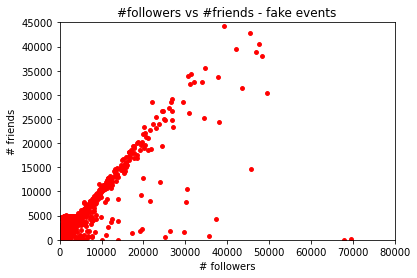

In [ ]:
F_followers_count = []
F_friends_count = []
F_statuses_count = []
cf = 0

for i in inter_fake:
  if i==1:
    F_followers_count.append(df.iloc[cf]['followers_count'])
    F_friends_count.append(df.iloc[cf]['friends_count'])
    F_statuses_count.append(df.iloc[cf]['statuses_count'])
  cf+=1

print("F_followers_count: ", min(F_followers_count), max(F_followers_count))
print("F_friends_count: ", min(F_friends_count), max(F_friends_count))
print("F_statuses_count: ", min(F_statuses_count), max(F_statuses_count))


import matplotlib.pyplot as plt
plt.scatter(F_followers_count, F_friends_count, s=15, c="red")
plt.xlim(0, 80000)
plt.ylim(0, 45000)
plt.xlabel("# followers")
plt.ylabel("# friends")
plt.title("#followers vs #friends - fake events")
plt.show()

R_followers_count:  0 45409227
R_friends_count:  0 501567
R_statuses_count:  1 2346366


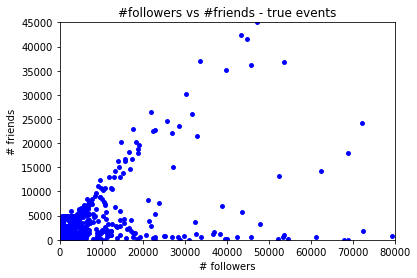

In [ ]:
R_followers_count = []
R_friends_count = []
R_statuses_count = []
cr = 0

for i in inter_real:
  if i==1:
    R_followers_count.append(df.iloc[cr]['followers_count'])
    R_friends_count.append(df.iloc[cr]['friends_count'])
    R_statuses_count.append(df.iloc[cr]['statuses_count'])
  cr+=1

print("R_followers_count: ", min(R_followers_count), max(R_followers_count))
print("R_friends_count: ", min(R_friends_count), max(R_friends_count))
print("R_statuses_count: ", min(R_statuses_count), max(R_statuses_count))

plt.scatter(R_followers_count, R_friends_count, s=15, c="blue")
plt.xlim(0, 80000)
plt.ylim(0, 45000)
plt.xlabel("# followers")
plt.ylabel("# friends")
plt.title("#followers vs #friends - true events")
plt.show()

##visualizing fake and true events together

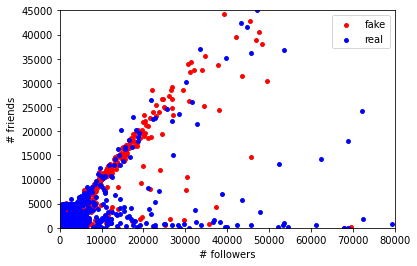

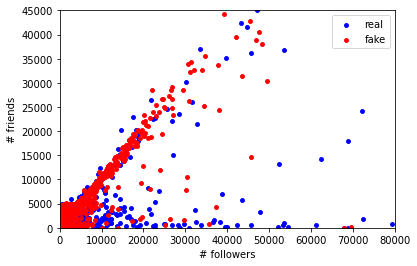

In [ ]:
plt.scatter(F_followers_count, F_friends_count, s=15, c="red")
plt.scatter(R_followers_count, R_friends_count, s=15, c="blue")
plt.xlim(0, 80000)
plt.ylim(0, 45000)
plt.xlabel("# followers")
plt.ylabel("# friends")
plt.legend(["fake", "real"])
plt.show()

plt.scatter(R_followers_count, R_friends_count, s=15, c="blue")
plt.scatter(F_followers_count, F_friends_count, s=15, c="red")
plt.xlim(0, 80000)
plt.ylim(0, 45000)
plt.xlabel("# followers")
plt.ylabel("# friends")
plt.legend(["real", "fake"])
plt.show()

# A closer look into the range x:(0, 10000) and y:(0, 10000)

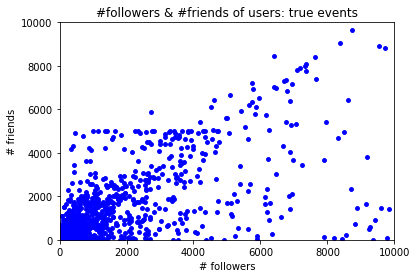

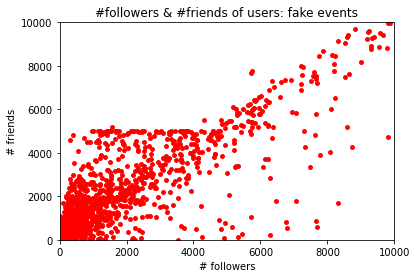

In [ ]:
plt.scatter(R_followers_count, R_friends_count, s=15, c="blue")
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.xlabel("# followers")
plt.ylabel("# friends")
plt.title("#followers & #friends of users: true events")
plt.show()

plt.scatter(F_followers_count, F_friends_count, s=15, c="red")
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.xlabel("# followers")
plt.ylabel("# friends")
plt.title("#followers & #friends of users: fake events")
plt.show()

## a closer look into the range x:(0, 4000) and y:(0, 6000)

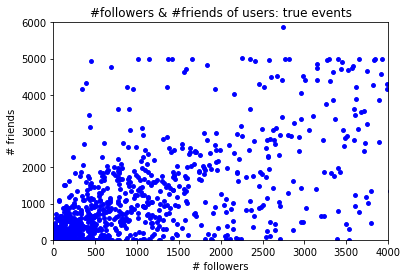

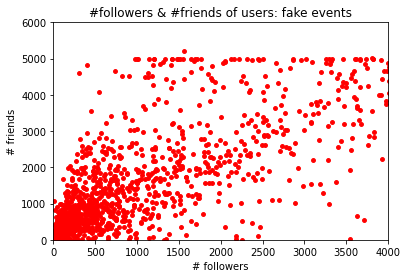

In [ ]:
plt.scatter(R_followers_count, R_friends_count, s=15, c="blue")
plt.xlim(0, 4000)
plt.ylim(0, 6000)
plt.xlabel("# followers")
plt.ylabel("# friends")
plt.title("#followers & #friends of users: true events")
plt.show()

plt.scatter(F_followers_count, F_friends_count, s=15, c="red")
plt.xlim(0, 4000)
plt.ylim(0, 6000)
plt.xlabel("# followers")
plt.ylabel("# friends")
plt.title("#followers & #friends of users: fake events")
plt.show()

#friends_count vs user_ids

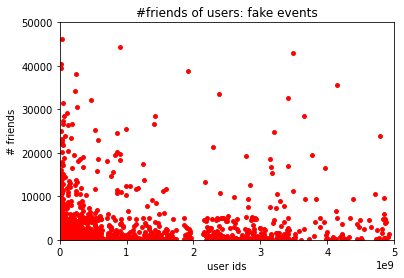

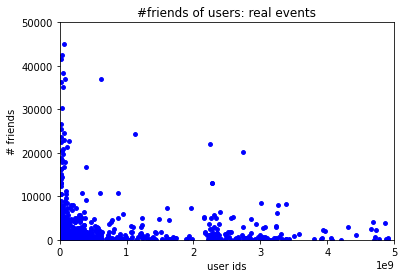

In [ ]:
plt.scatter(F_userIds, F_friends_count, s=15, c="red")
plt.xlim(0, 5000000000)
plt.ylim(0, 50000)
plt.xlabel("user ids")
plt.ylabel("# friends")
plt.title("#friends of users: fake events")
plt.show()

plt.scatter(R_userIds, R_friends_count, s=15, c="blue")
plt.xlim(0, 5000000000)
plt.ylim(0, 50000)
plt.xlabel("user ids")
plt.ylabel("# friends")
plt.title("#friends of users: real events")
plt.show()

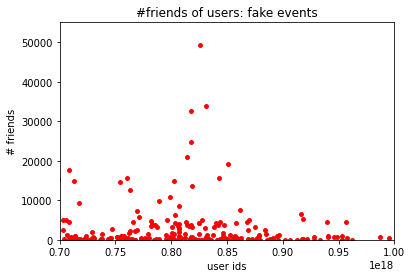

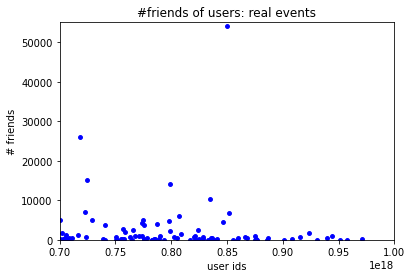

In [ ]:
plt.scatter(F_userIds, F_friends_count, s=15, c="red")
plt.xlim(7e17, 1e18)
plt.ylim(0, 55000)
plt.xlabel("user ids")
plt.ylabel("# friends")
plt.title("#friends of users: fake events")
plt.show()

plt.scatter(R_userIds, R_friends_count, s=15, c="blue")
plt.xlim(7e17, 1e18)
plt.ylim(0, 55000)
plt.xlabel("user ids")
plt.ylabel("# friends")
plt.title("#friends of users: real events")
plt.show()

#followers_count vs user_ids

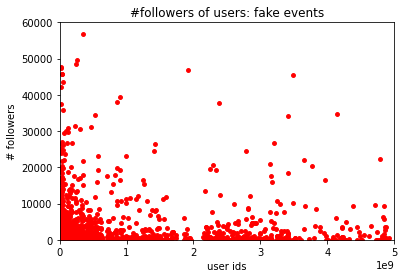

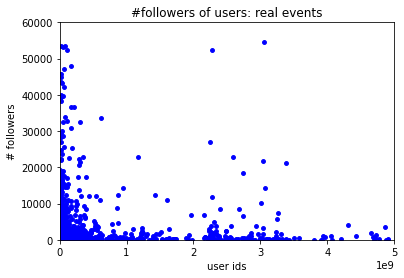

In [ ]:
plt.scatter(F_userIds, F_followers_count, s=15, c="red")
plt.xlim(0, 5000000000)
plt.ylim(0, 60000)
plt.xlabel("user ids")
plt.ylabel("# followers")
plt.title("#followers of users: fake events")
plt.show()

plt.scatter(R_userIds, R_followers_count, s=15, c="blue")
plt.xlim(0, 5000000000)
plt.ylim(0, 60000)
plt.xlabel("user ids")
plt.ylabel("# followers")
plt.title("#followers of users: real events")
plt.show()

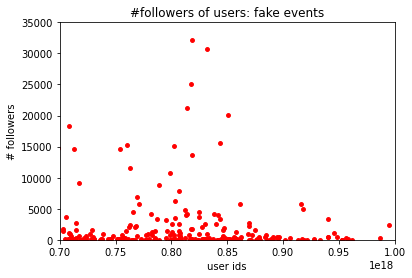

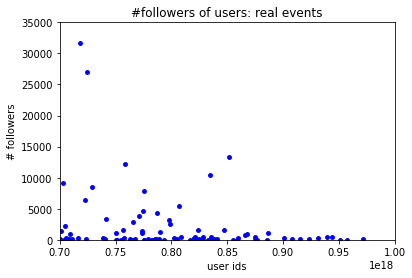

In [ ]:
plt.scatter(F_userIds, F_followers_count, s=15, c="red")
plt.xlim(7e17, 1e18)
plt.ylim(0, 35000)
plt.xlabel("user ids")
plt.ylabel("# followers")
plt.title("#followers of users: fake events")
plt.show()

plt.scatter(R_userIds, R_followers_count, s=15, c="blue")
plt.xlim(7e17, 1e18)
plt.ylim(0, 35000)
plt.xlabel("user ids")
plt.ylabel("# followers")
plt.title("#followers of users: real events")
plt.show()

#statuses_count vs user_ids

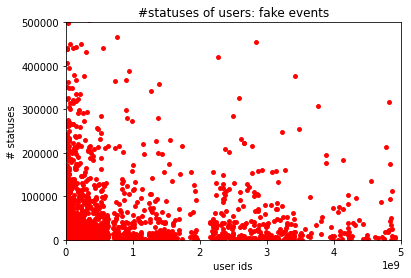

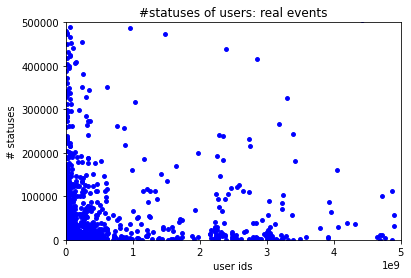

In [ ]:
plt.scatter(F_userIds, F_statuses_count, s=15, c="red")
plt.xlim(0, 5000000000)
plt.ylim(0, 500000)
plt.xlabel("user ids")
plt.ylabel("# statuses")
plt.title("#statuses of users: fake events")
plt.show()

plt.scatter(R_userIds, R_statuses_count, s=15, c="blue")
plt.xlim(0, 5000000000)
plt.ylim(0, 500000)
plt.xlabel("user ids")
plt.ylabel("# statuses")
plt.title("#statuses of users: real events")
plt.show()

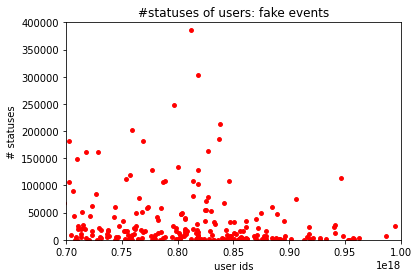

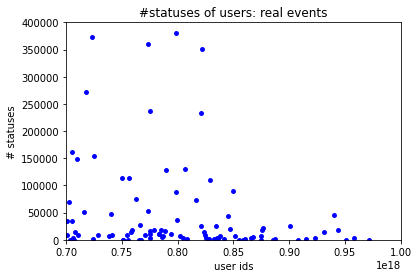

In [ ]:
plt.scatter(F_userIds, F_statuses_count, s=15, c="red")
plt.xlim(7e17, 1e18)
plt.ylim(0, 400000)
plt.xlabel("user ids")
plt.ylabel("# statuses")
plt.title("#statuses of users: fake events")
plt.show()

plt.scatter(R_userIds, R_statuses_count, s=15, c="blue")
plt.xlim(7e17, 1e18)
plt.ylim(0, 400000)
plt.xlabel("user ids")
plt.ylabel("# statuses")
plt.title("#statuses of users: real events")
plt.show()

#Comparing the features of random pairs of real and fake news events

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean

In [ ]:
directory = "/content/drive/MyDrive/FakeNewDet-FYP/code/fakenewsnet_dataset/politifact/fake"
F_articles_ids = {}

for folder in os.listdir(directory):
  folder_path=str(directory)+"/"+str(folder)+"/"+str("tweets")
  if not os.path.exists(folder_path):
    continue
  F_articles_ids[folder] = []
  for File in os.listdir(folder_path+"/"):
    json_path = str(folder_path)+"/"+str(File)
    j=open(json_path)
    data = json.load(j)
    F_articles_ids[folder].append(data['user']['id'])

print(F_articles_ids)

{'politifact15553': [995027141803769857, 4282987814, 4478966056, 3961773437], 'politifact15309': [1924249242, 359263457, 833742731952394240, 2791790095, 388246324, 235185955, 2827971698, 51332023, 36171947, 236748939, 1027972254, 760613481313890305, 637124912, 234497162, 4781576424, 93270447, 860760564, 533077535, 41928944, 484966779, 217137252, 760987159067234305, 767621685822513153, 49892671, 73205897, 2199979194, 136811343, 2492877258, 359263457, 86856593, 8637082, 329201052, 4332143482, 60152472, 1891322000, 730580706590633984, 2207215536, 910975728, 581948329, 38041344, 838225012662362112, 4838972504, 2986397738, 795669076907593728, 221454090, 525828807, 24358319, 987015151, 2854596119, 906225484861767680, 133027929, 16382117, 55814586, 1087940654, 49874045, 3270476594, 746412995903791105, 865242169, 1118130128, 455537031, 861365913802690560, 32672411, 777831024189444096, 3397101309, 2841714842, 529745607, 843097673901232128, 825026705731502080, 300615384, 2827582710, 109317125, 1

In [ ]:
with open('/content/drive/MyDrive/final_year_project/F_articles_ids.json', 'w') as json_file:
    json.dump(F_articles_ids, json_file)
    
f=open('/content/drive/MyDrive/final_year_project/F_articles_ids.json')
F_articles_ids=json.load(f)
print(F_articles_ids)

In [ ]:
F_articles_ids_freq = {}
for i in F_articles_ids:
  F_articles_ids[i].sort()
  count = []
  for j in range(len(F_articles_ids[i])):
      count.append(F_articles_ids[i].count(F_articles_ids[i][j]))
  F_articles_ids_freq[i] = dict(zip(F_articles_ids[i], count))
  
F_event_sum_freq = []
F_event_num_users = []
F_event_avg_freq = []
for i in F_articles_ids_freq:
  print(i, ": ", F_articles_ids_freq[i])
  sum_freq = 0
  num_users = 0
  for freq in F_articles_ids_freq[i].values():
    sum_freq+=freq
    num_users+=1
  F_event_sum_freq.append(sum_freq)
  F_event_num_users.append(num_users)
  F_event_avg_freq.append(sum_freq/num_users)

F_avg_num_users = sum(F_event_num_users)/len(F_articles_ids_freq)
print("\navg #users for fake events: ", F_avg_num_users)

print("event_sum_freq: ", F_event_sum_freq)
print("event_num_users: ", F_event_num_users)
print("event_avg_freq: ", F_event_avg_freq)
print("avg freq over all the events: ", sum(F_event_sum_freq)/sum(F_event_num_users))

politifact15553 :  {3961773437: 1, 4282987814: 1, 4478966056: 1, 995027141803769857: 1}
politifact15309 :  {8637082: 1, 15268506: 1, 16382117: 1, 18159783: 1, 18266477: 1, 24358319: 1, 32672411: 1, 36171947: 1, 38041344: 1, 41928944: 1, 49874045: 1, 49892671: 1, 51332023: 1, 55814586: 1, 58554518: 1, 60152472: 1, 73205897: 1, 86856593: 1, 93270447: 1, 109317125: 1, 133027929: 1, 136811343: 1, 217137252: 1, 221454090: 1, 234497162: 1, 235185955: 1, 236748939: 1, 300615384: 1, 329201052: 1, 359263457: 2, 388246324: 1, 452427952: 1, 455537031: 2, 461302986: 1, 484966779: 1, 525828807: 1, 529745607: 1, 533077535: 1, 554201184: 1, 566828522: 1, 581948329: 1, 637124912: 1, 709040768: 1, 860760564: 1, 865242169: 1, 910975728: 1, 945633636: 1, 987015151: 1, 1027972254: 1, 1087940654: 1, 1118130128: 1, 1499540208: 1, 1735682882: 1, 1891322000: 1, 1924249242: 1, 2199979194: 1, 2207215536: 1, 2492877258: 1, 2791790095: 1, 2827582710: 1, 2827971698: 1, 2841714842: 1, 2854596119: 1, 2986397738: 1, 

In [ ]:
print("min and max frequency in each fake event:")
for i in F_articles_ids_freq:
  frequencies = list(F_articles_ids_freq[i].values())
  max_frequency = max(frequencies)
  min_frequency = min(frequencies)
  print(i, ": ", min_frequency, max_frequency)

min and max frequency in each fake event:
politifact15553 :  1 1
politifact15309 :  1 2
politifact15591 :  1 2
politifact15367 :  1 2
politifact15371 :  1 3
politifact15280 :  1 9
politifact15267 :  1 1
politifact15004 :  1 2
politifact15130 :  1 1
politifact15164 :  1 1
politifact15251 :  1 1
politifact15156 :  1 2
politifact15052 :  1 2
politifact15014 :  1 2
politifact15178 :  1 2
politifact14940 :  1 2
politifact14890 :  1 2
politifact14745 :  1 2
politifact14776 :  1 2
politifact14694 :  1 1
politifact14795 :  1 2
politifact14863 :  1 3
politifact14742 :  1 1
politifact14755 :  1 1
politifact14664 :  1 2
politifact14404 :  1 2
politifact14544 :  1 2
politifact14328 :  1 2
politifact14376 :  1 2
politifact14355 :  1 1
politifact14310 :  1 30
politifact14356 :  1 2
politifact14258 :  1 2
politifact14235 :  1 10
politifact13887 :  1 2
politifact13775 :  1 3
politifact13806 :  1 2
politifact13836 :  1 7
politifact13949 :  1 4
politifact13773 :  1 2
politifact14233 :  1 1
politifact136

In [ ]:
directory = "/content/drive/MyDrive/FakeNewDet-FYP/code/fakenewsnet_dataset/politifact/real"
R_articles_ids = {}

for folder in os.listdir(directory):
  folder_path=str(directory)+"/"+str(folder)+"/"+str("tweets")
  if not os.path.exists(folder_path):
    continue
  R_articles_ids[folder] = []
  for File in os.listdir(folder_path+"/"):
    json_path = str(folder_path)+"/"+str(File)
    j=open(json_path)
    data = json.load(j)
    R_articles_ids[folder].append(data['user']['id'])

print(R_articles_ids)

{'politifact9691': [770240462, 1582545024, 8235612, 528829450, 2493909948, 2337082928, 1697156834, 1569024032, 1700193517, 123911261, 2349870360, 2291323957, 1037090653, 2667084024, 52419540, 440123579, 1317792486, 24481831, 737489808, 2414860926, 2149788174, 14549486, 238278490, 2247991128, 1317792486, 528829450, 21027715, 2348507946, 15347644, 2149788174, 63528484, 250693957, 770240462, 1697156834, 240334048, 24733117, 552435216, 23719043, 113490650, 11856032, 116155386, 278688378, 173054372, 8235612, 448637877, 817652, 72552866, 2638745360], 'politifact9576': [2368253214, 59500657, 466519586, 606663661, 2300551194, 111919616], 'politifact9196': [15676749, 15676749, 15377478, 68203907, 14112910, 34206249, 17352859], 'politifact937': [21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 2199

In [ ]:
with open('/content/drive/MyDrive/final_year_project/R_articles_ids.json', 'w') as json_file:
    json.dump(R_articles_ids, json_file)
    
f=open('/content/drive/MyDrive/final_year_project/R_articles_ids.json')
R_articles_ids=json.load(f)
print(R_articles_ids)

{'politifact9691': [817652, 8235612, 8235612, 11856032, 14549486, 15347644, 21027715, 23719043, 24481831, 24733117, 52419540, 63528484, 72552866, 113490650, 116155386, 123911261, 173054372, 238278490, 240334048, 250693957, 278688378, 440123579, 448637877, 528829450, 528829450, 552435216, 737489808, 770240462, 770240462, 1037090653, 1317792486, 1317792486, 1569024032, 1582545024, 1697156834, 1697156834, 1700193517, 2149788174, 2149788174, 2247991128, 2291323957, 2337082928, 2348507946, 2349870360, 2414860926, 2493909948, 2638745360, 2667084024], 'politifact9576': [59500657, 111919616, 466519586, 606663661, 2300551194, 2368253214], 'politifact9196': [14112910, 15377478, 15676749, 15676749, 17352859, 34206249, 68203907], 'politifact937': [21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 21993071, 2199

In [ ]:
R_articles_ids_freq = {}
for i in R_articles_ids:
  R_articles_ids[i].sort()
  count = []
  for j in range(len(R_articles_ids[i])):
      count.append(R_articles_ids[i].count(R_articles_ids[i][j]))
  R_articles_ids_freq[i] = dict(zip(R_articles_ids[i], count))

R_event_sum_freq = []
R_event_num_users = []
R_event_avg_freq = []  
for i in R_articles_ids_freq:
  print(i, ": ", R_articles_ids_freq[i])
  sum_freq = 0
  num_users = 0
  for freq in R_articles_ids_freq[i].values():
    sum_freq+=freq
    num_users+=1
  R_event_sum_freq.append(sum_freq)
  R_event_num_users.append(num_users)
  R_event_avg_freq.append(sum_freq/num_users)

R_avg_num_users = sum(R_event_num_users)/len(R_articles_ids_freq)
print("\navg #users for real events: ", R_avg_num_users)

print("event_sum_freq: ", R_event_sum_freq)
print("event_num_users: ", R_event_num_users)
print("event_avg_freq: ", R_event_avg_freq)
print("avg freq over all the events: ", sum(R_event_sum_freq)/sum(R_event_num_users))

politifact9691 :  {817652: 1, 8235612: 2, 11856032: 1, 14549486: 1, 15347644: 1, 21027715: 1, 23719043: 1, 24481831: 1, 24733117: 1, 52419540: 1, 63528484: 1, 72552866: 1, 113490650: 1, 116155386: 1, 123911261: 1, 173054372: 1, 238278490: 1, 240334048: 1, 250693957: 1, 278688378: 1, 440123579: 1, 448637877: 1, 528829450: 2, 552435216: 1, 737489808: 1, 770240462: 2, 1037090653: 1, 1317792486: 2, 1569024032: 1, 1582545024: 1, 1697156834: 2, 1700193517: 1, 2149788174: 2, 2247991128: 1, 2291323957: 1, 2337082928: 1, 2348507946: 1, 2349870360: 1, 2414860926: 1, 2493909948: 1, 2638745360: 1, 2667084024: 1}
politifact9576 :  {59500657: 1, 111919616: 1, 466519586: 1, 606663661: 1, 2300551194: 1, 2368253214: 1}
politifact9196 :  {14112910: 1, 15377478: 1, 15676749: 2, 17352859: 1, 34206249: 1, 68203907: 1}
politifact937 :  {21993071: 37}
politifact806 :  {14313371: 1, 15667313: 1, 15976693: 1, 28313639: 1, 126951317: 1, 390278440: 1, 469880748: 4, 539665155: 1, 2732348582: 1, 784875338958381056

In [ ]:
print("min and max frequency in each real event:")
for i in R_articles_ids_freq:
  frequencies = list(R_articles_ids_freq[i].values())
  max_frequency = max(frequencies)
  min_frequency = min(frequencies)
  print(i, ": ", min_frequency, max_frequency)

min and max frequency in each real event:
politifact9691 :  1 2
politifact9576 :  1 1
politifact9196 :  1 2
politifact937 :  37 37
politifact806 :  1 4
politifact779 :  1 1
politifact6641 :  1 2
politifact58 :  1 1
politifact537 :  1 8
politifact513 :  1 5
politifact423 :  1 1
politifact3892 :  1 1
politifact401 :  1 2
politifact384 :  1 2
politifact356 :  1 17
politifact2166 :  1 6
politifact1519 :  1 2
politifact14984 :  1 7
politifact14474 :  1 6
politifact14064 :  1 2
politifact14070 :  1 2
politifact13420 :  1 12
politifact14036 :  1 4
politifact13303 :  1 4
politifact13132 :  1 2
politifact1313 :  1 14
politifact13068 :  1 1
politifact13087 :  1 10
politifact12945 :  1 2
politifact12944 :  1 9
politifact118 :  1 5
politifact12148 :  1 1
politifact1084 :  1 7
politifact11747 :  1 2


#**Comparing random pairs of fake & real events**

#Events considered:

**fake: politifact14310**

\#users: 54, effective #users: 50

min_freq: 1, max_freq: 30, avg_freq: 1.74


**real: politifact1519**

\#users: 53, effective #users: 50

min_freq:1, max_freq:2, avg_freq: 1.02


In [ ]:
F_ids = list(set(F_articles_ids['politifact14310']))
print("#user ids for fake event: ", len(F_ids))

R_ids = list(set(R_articles_ids['politifact1519']))
print("#user ids for real event: ", len(R_ids))

#user ids for fake event:  54
#user ids for real event:  53


In [ ]:
F_followers_count = []
F_friends_count = []
F_statuses_count = []

F_id = []
print(len(F_ids), F_ids)
for i in F_ids:
  if i in user_id:
    F_id.append(i)
    F_followers_count.append(followers[i])
    F_friends_count.append(friends[i])
    F_statuses_count.append(statuses[i])

print(len(F_id), F_id)
print(len(F_followers_count), F_followers_count)

54 [2508050305, 215459458, 134694788, 36514310, 30646793, 265982345, 28094219, 320933771, 441197202, 23257880, 3320400025, 54476445, 1537304478, 68807455, 532554400, 2521147680, 2246898978, 28190118, 77550503, 1003312808, 469734954, 932390060, 3280551852, 260992687, 1635127471, 331277617, 19355955, 77143479, 292452023, 47534393, 18020666, 3107718844, 84823872, 185505217, 372572992, 528175809, 93935172, 943608768, 2613009216, 2991100738, 289508298, 2572033740, 613654095, 66623699, 230006882, 1343501538, 158064102, 14359655, 2648649574, 2584851314, 242686067, 556970613, 100940918, 457646715]
47 [2508050305, 215459458, 30646793, 265982345, 28094219, 320933771, 441197202, 23257880, 54476445, 532554400, 2246898978, 28190118, 77550503, 1003312808, 469734954, 932390060, 3280551852, 260992687, 1635127471, 331277617, 19355955, 77143479, 292452023, 47534393, 18020666, 3107718844, 84823872, 185505217, 372572992, 528175809, 93935172, 943608768, 2613009216, 2991100738, 2572033740, 613654095, 666236

In [ ]:
R_followers_count = []
R_friends_count = []
R_statuses_count = []

R_id = []
print(len(R_ids), R_ids)
for i in R_ids:
  if i in user_id:
    R_id.append(i)
    R_followers_count.append(followers[i])
    R_friends_count.append(friends[i])
    R_statuses_count.append(statuses[i])

print(len(R_id), R_id)
print(len(R_followers_count), R_followers_count)

53 [72478337, 10728582, 50156425, 35606154, 76704143, 14173840, 27622288, 107426072, 70336155, 60941344, 83236001, 16828706, 10583972, 29241386, 19014959, 20558511, 16670260, 84134713, 17174717, 15801149, 19850687, 100623041, 55155523, 60108742, 19476295, 65056071, 73833799, 24936183, 24582350, 15440079, 35811920, 60180942, 94524881, 18767699, 31047124, 76989270, 64256215, 9280862, 41684703, 19786336, 88076663, 84696548, 76971750, 16790634, 65406187, 61358572, 17602541, 93268461, 14904433, 117031540, 15621239, 25632889, 18198655]
47 [72478337, 10728582, 50156425, 35606154, 14173840, 27622288, 107426072, 70336155, 60941344, 83236001, 10583972, 29241386, 19014959, 20558511, 16670260, 17174717, 15801149, 19850687, 100623041, 55155523, 60108742, 19476295, 65056071, 73833799, 24936183, 24582350, 15440079, 35811920, 94524881, 18767699, 31047124, 76989270, 64256215, 9280862, 41684703, 88076663, 84696548, 76971750, 16790634, 65406187, 61358572, 17602541, 14904433, 117031540, 15621239, 25632889

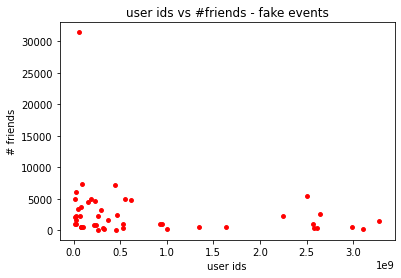

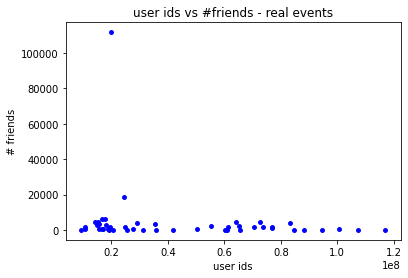


avg #friends in fake event:  2768.7021276595747
avg #friends in real event:  4304.170212765957


In [ ]:
plt.scatter(F_id, F_friends_count, s=15, c="red")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# friends")
plt.title("user ids vs #friends - fake events")
plt.show()

plt.scatter(R_id, R_friends_count, s=15, c="blue")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# friends")
plt.title("user ids vs #friends - real events")
plt.show()

print("\navg #friends in fake event: ", mean(F_friends_count))
print("avg #friends in real event: ", mean(R_friends_count))

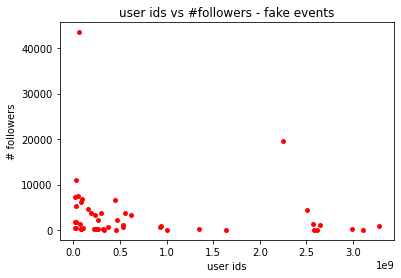

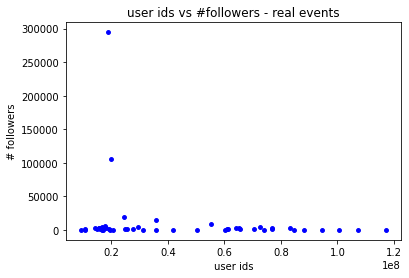


avg #followers in fake event:  3413.191489361702
avg #followers in real event:  10719.72340425532


In [ ]:
plt.scatter(F_id, F_followers_count, s=15, c="red")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# followers")
plt.title("user ids vs #followers - fake events")
plt.show()

plt.scatter(R_id, R_followers_count, s=15, c="blue")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# followers")
plt.title("user ids vs #followers - real events")
plt.show()

print("\navg #followers in fake event: ", mean(F_followers_count))
print("avg #followers in real event: ", mean(R_followers_count))

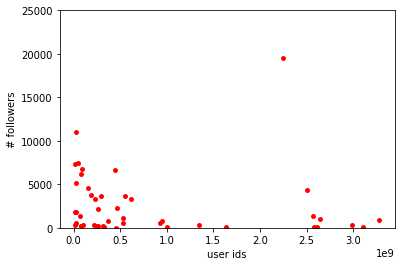

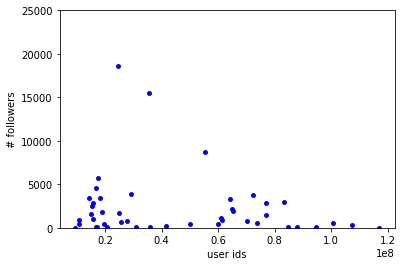


avg #followers in fake event:  3413.191489361702
avg #followers in real event:  10719.72340425532


In [ ]:
plt.scatter(F_id, F_followers_count, s=15, c="red")
# plt.xlim(0, 80000)
plt.ylim(0, 25000)
plt.xlabel("user ids")
plt.ylabel("# followers")
# plt.title("user ids vs #followers - fake events")
plt.show()

plt.scatter(R_id, R_followers_count, s=15, c="blue")
# plt.xlim(0, 80000)
plt.ylim(0, 25000)
plt.xlabel("user ids")
plt.ylabel("# followers")
# plt.title("user ids vs #followers - real events")
plt.show()

print("\navg #followers in fake event: ", mean(F_followers_count))
print("avg #followers in real event: ", mean(R_followers_count))

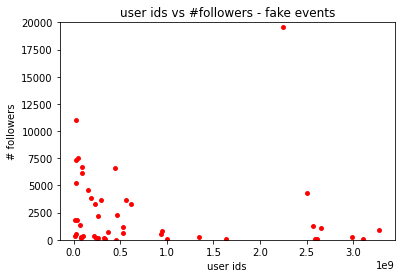

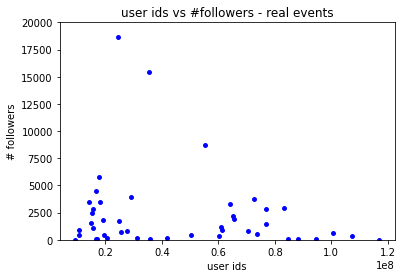


avg #followers in fake event:  3413.191489361702
avg #followers in real event:  10719.72340425532


In [ ]:
plt.scatter(F_id, F_followers_count, s=15, c="red")
# plt.xlim(0, 80000)
plt.ylim(0, 20000)
plt.xlabel("user ids")
plt.ylabel("# followers")
plt.title("user ids vs #followers - fake events")
plt.show()

plt.scatter(R_id, R_followers_count, s=15, c="blue")
# plt.xlim(0, 80000)
plt.ylim(0, 20000)
plt.xlabel("user ids")
plt.ylabel("# followers")
plt.title("user ids vs #followers - real events")
plt.show()

print("\navg #followers in fake event: ", mean(F_followers_count))
print("avg #followers in real event: ", mean(R_followers_count))

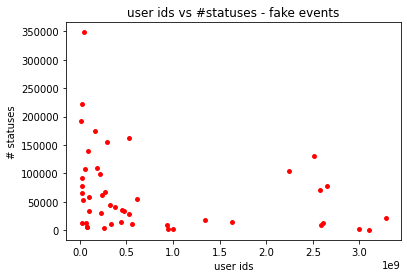

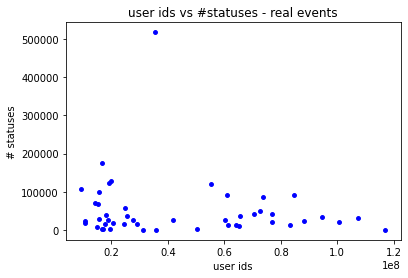


avg #statuses in fake event:  64453.65957446808
avg #statuses in real event:  51537.78723404255


In [ ]:
plt.scatter(F_id, F_statuses_count, s=15, c="red")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# statuses")
plt.title("user ids vs #statuses - fake events")
plt.show()

plt.scatter(R_id, R_statuses_count, s=15, c="blue")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# statuses")
plt.title("user ids vs #statuses - real events")
plt.show()

print("\navg #statuses in fake event: ", mean(F_statuses_count))
print("avg #statuses in real event: ", mean(R_statuses_count))

#Events considered:

**fake: politifact14755**

\#users: 58, effective #users: 50

min_freq: 1, max_freq: 1, avg_freq: 1.0


**real: politifact11747**

\#users: 54, effective #users: 49

min_freq:1, max_freq:2, avg_freq: 1.07

In [ ]:
F_ids_2 = list(set(F_articles_ids['politifact14755']))
print("#user ids for fake event: ", len(F_ids_2))

R_ids_2 = list(set(R_articles_ids['politifact11747']))
print("#user ids for real event: ", len(R_ids_2))

#user ids for fake event:  58
#user ids for real event:  54


In [ ]:
F_followers_count_2 = []
F_friends_count_2 = []
F_statuses_count_2 = []

F_id_2 = []
print(len(F_ids_2), F_ids_2)
for i in F_ids_2:
  if i in user_id:
    F_id_2.append(i)
    F_followers_count_2.append(followers[i])
    F_friends_count_2.append(friends[i])
    F_statuses_count_2.append(statuses[i])

print(len(F_id_2), F_id_2)
print(len(F_followers_count_2), F_followers_count_2)
print(mean(F_followers_count_2), mean(F_friends_count_2), mean(F_statuses_count_2))

58 [316693760, 531448576, 215459458, 25648003, 1470507266, 706156588407529473, 18356870, 161169287, 2497479302, 37197193, 4086424329, 4919190795, 812454149912662017, 825045832206540801, 895710630191271937, 3483594256, 3166178833, 343013139, 1148372244, 1355218452, 220323863, 4219197432, 4861243801, 157132570, 769302909511163904, 301765023, 633585568, 76387233, 36890914, 3413546019, 128225830, 1265464230, 3356837416, 100672174, 856491663576969216, 16512565, 52624182, 313580985, 737146178, 168485575, 50913224, 183537737, 49884490, 438728009, 2677883598, 807012565, 4216495573, 35979866, 1242945883, 118218465, 72878948, 17163752, 1851304818, 31506167, 157485432, 32785658, 25261819, 919172863]
50 [316693760, 531448576, 215459458, 25648003, 18356870, 161169287, 2497479302, 37197193, 4086424329, 4919190795, 812454149912662017, 825045832206540801, 895710630191271937, 3483594256, 3166178833, 343013139, 1148372244, 1355218452, 220323863, 4219197432, 4861243801, 769302909511163904, 301765023, 633

In [ ]:
R_followers_count_2 = []
R_friends_count_2 = []
R_statuses_count_2 = []

R_id_2 = []
print(len(R_ids_2), R_ids_2)
for i in R_ids_2:
  if i in user_id:
    R_id_2.append(i)
    R_followers_count_2.append(followers[i])
    R_friends_count_2.append(friends[i])
    R_statuses_count_2.append(statuses[i])

print(len(R_id_2), R_id_2)
print(len(R_followers_count_2), R_followers_count_2)
print(mean(R_followers_count_2), mean(R_friends_count_2), mean(R_statuses_count_2))

54 [799250105572491264, 931043662586433536, 2480183299, 1033011336278466563, 154588808, 180690953, 1331599626, 129956619, 374924043, 16020751, 73287695, 145276441, 14776606, 519681951, 24216744, 38972712, 388212138, 337828396, 86029229, 386005807, 92164017, 321781431, 368859833, 83234874, 110851898, 450347839, 47111744, 97199937, 23265737, 243446474, 447752777, 132247757, 215019853, 18665937, 69329363, 78579411, 1396234580, 46628185, 594944985, 62340193, 1431998562, 66315626, 320180972, 952279789, 334789487, 12199152, 277633136, 211006194, 110685556, 14354042, 56875644, 605773565, 94243838, 41326847]
49 [799250105572491264, 931043662586433536, 2480183299, 1033011336278466563, 154588808, 1331599626, 129956619, 374924043, 16020751, 145276441, 14776606, 519681951, 24216744, 38972712, 388212138, 337828396, 86029229, 386005807, 92164017, 321781431, 368859833, 83234874, 110851898, 450347839, 47111744, 23265737, 243446474, 132247757, 215019853, 18665937, 69329363, 78579411, 1396234580, 466281

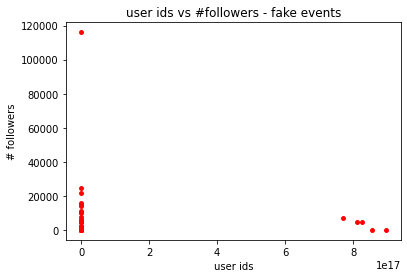

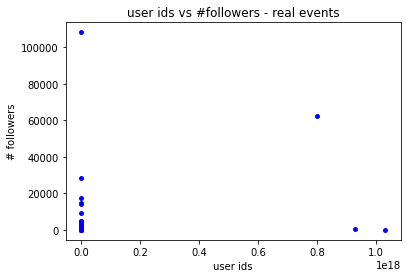


avg #followers in fake event:  6219.7
avg #followers in real event:  6376.183673469388


In [ ]:
plt.scatter(F_id_2, F_followers_count_2, s=15, c="red")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# followers")
plt.title("user ids vs #followers - fake events")
plt.show()

plt.scatter(R_id_2, R_followers_count_2, s=15, c="blue")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# followers")
plt.title("user ids vs #followers - real events")
plt.show()

print("\navg #followers in fake event: ", mean(F_followers_count_2))
print("avg #followers in real event: ", mean(R_followers_count_2))

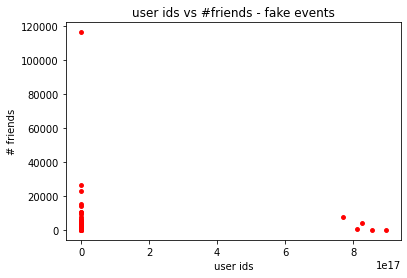

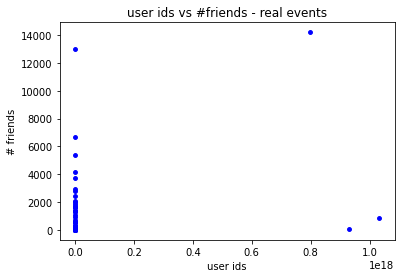


avg #friends in fake event:  6228.78
avg #friends in real event:  1639.857142857143


In [ ]:
plt.scatter(F_id_2, F_friends_count_2, s=15, c="red")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# friends")
plt.title("user ids vs #friends - fake events")
plt.show()

plt.scatter(R_id_2, R_friends_count_2, s=15, c="blue")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# friends")
plt.title("user ids vs #friends - real events")
plt.show()

print("\navg #friends in fake event: ", mean(F_friends_count_2))
print("avg #friends in real event: ", mean(R_friends_count_2))

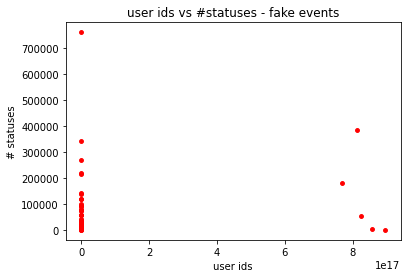

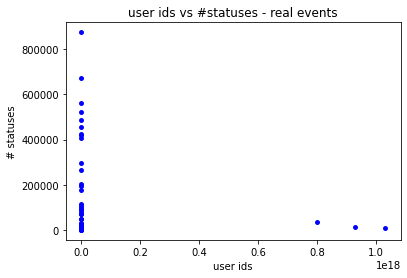


avg #statuses in fake event:  82791.72
avg #statuses in real event:  145808.16326530612


In [ ]:
plt.scatter(F_id_2, F_statuses_count_2, s=15, c="red")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# statuses")
plt.title("user ids vs #statuses - fake events")
plt.show()

plt.scatter(R_id_2, R_statuses_count_2, s=15, c="blue")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# statuses")
plt.title("user ids vs #statuses - real events")
plt.show()

print("\navg #statuses in fake event: ", mean(F_statuses_count_2))
print("avg #statuses in real event: ", mean(R_statuses_count_2))

#Events considered:

**fake: politifact13773**

\#users: 94, effective #users: 81

min_freq: 1, max_freq: 2, avg_freq: 1.02


**real: politifact401**

\#users: 91, effective #users: 79

min_freq:1, max_freq:2, avg_freq: 1.06

In [ ]:
F_ids_3 = list(set(F_articles_ids['politifact13773']))
print("#user ids for fake event: ", len(F_ids_3))

R_ids_3 = list(set(R_articles_ids['politifact401']))
print("#user ids for real event: ", len(R_ids_3))

#user ids for fake event:  94
#user ids for real event:  91


In [ ]:
F_followers_count_3 = []
F_friends_count_3 = []
F_statuses_count_3 = []

F_id_3 = []
print(len(F_ids_3), F_ids_3)
for i in F_ids_3:
  if i in user_id:
    F_id_3.append(i)
    F_followers_count_3.append(followers[i])
    F_friends_count_3.append(friends[i])
    F_statuses_count_3.append(statuses[i])

print(len(F_id_3), F_id_3)
print(len(F_followers_count_3), F_followers_count_3)
print(mean(F_followers_count_3), mean(F_friends_count_3), mean(F_statuses_count_3))

94 [177934854, 32420367, 19793936, 232604175, 1136811541, 210751000, 78433305, 273683993, 20245531, 35276829, 1521711138, 211191340, 2350510640, 167929906, 414483508, 15627848, 45093974, 134866013, 2669792352, 5774442, 2532078187, 18395244, 20241517, 404118128, 21864050, 7864952, 577252987, 18130557, 2176117376, 104863363, 124616850, 475224726, 71106714, 174069414, 1587170984, 68645035, 239253182, 2194202838, 1145374423, 250324698, 389711072, 928305888, 426902754, 42389731, 1959285992, 75149547, 16676087, 18915582, 265936127, 106185984, 28305154, 25243908, 2318487824, 14181151, 63682850, 14759203, 23294262, 22780216, 278069561, 1229695808, 121438021, 30632265, 24423243, 19295564, 238062415, 1969335120, 32215907, 60007783, 256913787, 65949052, 135806846, 200770946, 856421780, 391708055, 267252120, 590905250, 28539301, 574156197, 261981102, 21176248, 215585731, 348641225, 16332236, 93716941, 838572500, 1662872534, 619293144, 14218713, 238958042, 254918117, 109490667, 502012399, 588545013

In [ ]:
R_followers_count_3 = []
R_friends_count_3 = []
R_statuses_count_3 = []

R_id_3 = []
print(len(R_ids_3), R_ids_3)
for i in R_ids_3:
  if i in user_id:
    R_id_3.append(i)
    R_followers_count_3.append(followers[i])
    R_friends_count_3.append(friends[i])
    R_statuses_count_3.append(statuses[i])

print(len(R_id_3), R_id_3)
print(len(R_followers_count_3), R_followers_count_3)
print(mean(R_followers_count_3), mean(R_friends_count_3), mean(R_statuses_count_3))

91 [81114632, 98727457, 46151715, 19985444, 39566375, 77434921, 788226090, 20502577, 40978999, 27317819, 26119755, 201408075, 50747469, 56995406, 261199953, 512475733, 125324383, 369147489, 37607523, 13413, 103277670, 102327408, 1729631856, 94820466, 37435513, 139314812, 601314943, 251215519, 58922658, 15764657, 176907958, 789073598, 147271882, 490988747, 16445133, 15142606, 22882007, 305318105, 84533466, 239082202, 500189916, 71564512, 17981666, 325116134, 17225962, 111380716, 64040174, 5660912, 53222655, 839359752, 64630034, 107426072, 30134558, 130528035, 116564271, 138251057, 63727412, 18561344, 235298637, 180080464, 103393617, 168708945, 45049172, 398672217, 17980762, 17142109, 90408803, 608153597, 115754870, 360680312, 148432772, 78584714, 142929814, 403468694, 77437860, 99816870, 298260391, 39770024, 389657511, 326916528, 92167092, 354288567, 405067703, 713477569, 422335426, 231171026, 73175507, 27025372, 112450551, 219399672, 16039421]
79 [81114632, 98727457, 46151715, 19985444

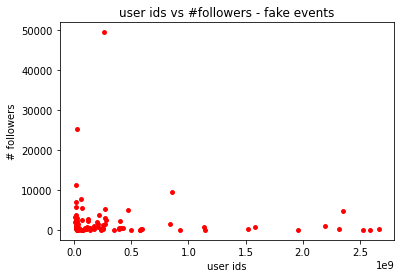

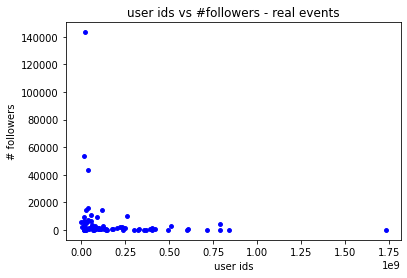


avg #followers in fake event:  2452.135802469136
avg #followers in real event:  5434.113924050633


In [ ]:
plt.scatter(F_id_3, F_followers_count_3, s=15, c="red")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# followers")
plt.title("user ids vs #followers - fake events")
plt.show()

plt.scatter(R_id_3, R_followers_count_3, s=15, c="blue")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# followers")
plt.title("user ids vs #followers - real events")
plt.show()

print("\navg #followers in fake event: ", mean(F_followers_count_3))
print("avg #followers in real event: ", mean(R_followers_count_3))

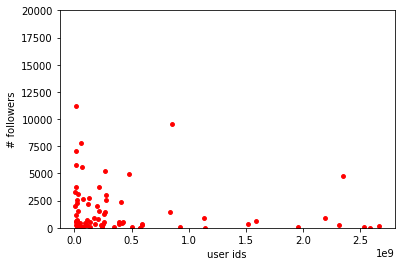

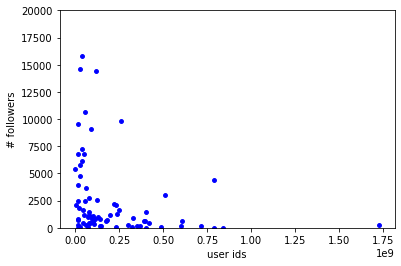


avg #followers in fake event:  2452.135802469136
avg #followers in real event:  5434.113924050633


In [ ]:
plt.scatter(F_id_3, F_followers_count_3, s=15, c="red")
# plt.xlim(0, 80000)
plt.ylim(0, 20000)
plt.xlabel("user ids")
plt.ylabel("# followers")
# plt.title("user ids vs #followers - fake events")
plt.show()

plt.scatter(R_id_3, R_followers_count_3, s=15, c="blue")
# plt.xlim(0, 80000)
plt.ylim(0, 20000)
plt.xlabel("user ids")
plt.ylabel("# followers")
# plt.title("user ids vs #followers - real events")
plt.show()

print("\navg #followers in fake event: ", mean(F_followers_count_3))
print("avg #followers in real event: ", mean(R_followers_count_3))

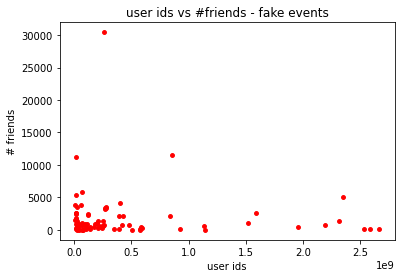

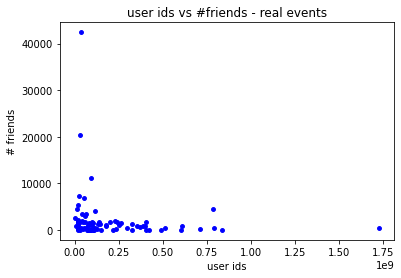


avg #friends in fake event:  1894.79012345679
avg #friends in real event:  2163.4050632911394


In [ ]:
plt.scatter(F_id_3, F_friends_count_3, s=15, c="red")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# friends")
plt.title("user ids vs #friends - fake events")
plt.show()

plt.scatter(R_id_3, R_friends_count_3, s=15, c="blue")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# friends")
plt.title("user ids vs #friends - real events")
plt.show()

print("\navg #friends in fake event: ", mean(F_friends_count_3))
print("avg #friends in real event: ", mean(R_friends_count_3))

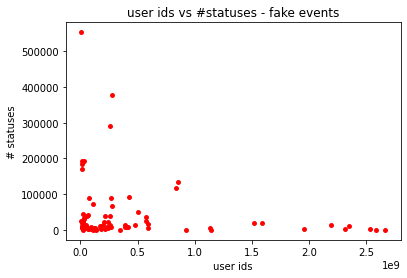

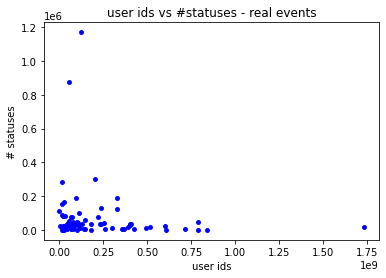


avg #statuses in fake event:  43208.83950617284
avg #statuses in real event:  69393.56962025317


In [ ]:
plt.scatter(F_id_3, F_statuses_count_3, s=15, c="red")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# statuses")
plt.title("user ids vs #statuses - fake events")
plt.show()

plt.scatter(R_id_3, R_statuses_count_3, s=15, c="blue")
# plt.xlim(0, 80000)
# plt.ylim(0, 45000)
plt.xlabel("user ids")
plt.ylabel("# statuses")
plt.title("user ids vs #statuses - real events")
plt.show()

print("\navg #statuses in fake event: ", mean(F_statuses_count_3))
print("avg #statuses in real event: ", mean(R_statuses_count_3))

#**Statistics of fake and true news events based on user profile features**

In [ ]:
from statistics import mean

stat = pd.DataFrame()
stat["event"] = ["fake", "true"]
stat["#users"] = [len(F_userIds), len(R_userIds)]
stat["avg_#followers"] = [mean(F_followers_count), mean(R_followers_count)]
stat["min_#followers"] = [min(F_followers_count), min(R_followers_count)]
stat["max_#followers"] = [max(F_followers_count), max(R_followers_count)]
stat["avg_#friends"] = [mean(F_friends_count), mean(R_friends_count)]
stat["min_#friends"] = [min(F_friends_count), min(R_friends_count)]
stat["max_#friends"] = [max(F_friends_count), max(R_friends_count)]
stat["avg_#statuses"] = [mean(F_statuses_count), mean(R_statuses_count)]
stat["min_#statuses"] = [min(F_statuses_count), min(R_statuses_count)]
stat["max_#statuses"] = [max(F_statuses_count), max(R_statuses_count)]

stat

,event,#users,avg_#followers,min_#followers,max_#followers,avg_#friends,min_#friends,max_#friends,avg_#statuses,min_#statuses,max_#statuses
0,fake,2017,4918,0,909831,3369,0,501567,65165,2,3467094
1,true,1256,65512,0,45409227,3218,0,501567,86395,1,2346366


#**Trend analysis**
Trends in the users' followers, friends and statuses count, who interacted with fake and real events

#Fake events

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/Time_Analysis_Fake.csv')
reactionTime = (df['art_tweet_time'].tolist())
print(len(reactionTime), reactionTime)

1207 [89223.0, 67978.0, 42086.0, 65806.0, 28946.0, 59363.0, 41201.0, 67977.0, 231300.0, 194091.0, 159238.0, 114563.0, 203987.0, 256025.0, 2708683.0, 175081.0, 191329.0, 129277.0, 217630.0, 222024.0, 212112.0, 192226.0, 204774.0, 156296.0, 205452.0, 208612.0, 154100.0, 175120.0, 156311.0, 184819.0, 217573.0, 221479.0, 175821.0, 168763.0, 190988.0, 180994.0, 174624.0, 212052.0, 187346.0, 213283.0, 159789.0, 106179.0, 228397.0, 252504.0, 226075.0, 281327.0, 253026.0, 427661.0, 265621.0, 259134.0, 294478.0, 269525.0, 233473.0, 264281.0, 262447.0, 195071.0, 453825.0, 193589.0, 238159.0, 335896.0, 266150.0, 250626.0, 240466.0, 245717.0, 253323.0, 255138.0, 227903.0, 275018.0, 260683.0, 197831.0, 255822.0, 251424.0, 454188.0, 222181.0, 342670.0, 471034.0, 248604.0, 193741.0, 244614.0, 269421.0, 199418.0, 262476.0, 246117.0, 228182.0, 255735.0, 289823.0, 262147.0, 225109.0, 259632.0, 194066.0, 193003.0, 224975.0, 459903.0, 453634.0, 256396.0, 281345.0, 269701.0, 251343.0, 251727.0, 192496.0, 2

#event-1, id: 15591

In [ ]:
event1_reactionTime = reactionTime[0:90]

In [ ]:
event1_reactionTime.sort()
print(event1_reactionTime)
print(min(event1_reactionTime), max(event1_reactionTime))
print("diff b/w max n min: ", max(event1_reactionTime)-min(event1_reactionTime))

[28946.0, 41201.0, 42086.0, 59363.0, 65806.0, 67977.0, 67978.0, 89223.0, 106179.0, 114563.0, 129277.0, 154100.0, 156296.0, 156311.0, 159238.0, 159789.0, 168763.0, 174624.0, 175081.0, 175120.0, 175821.0, 180994.0, 184819.0, 187346.0, 190988.0, 191329.0, 192226.0, 193589.0, 193741.0, 194066.0, 194091.0, 195071.0, 197831.0, 199418.0, 203987.0, 204774.0, 205452.0, 208612.0, 212052.0, 212112.0, 213283.0, 217573.0, 217630.0, 221479.0, 222024.0, 222181.0, 225109.0, 226075.0, 227903.0, 228182.0, 228397.0, 231300.0, 233473.0, 238159.0, 240466.0, 244614.0, 245717.0, 246117.0, 248604.0, 250626.0, 251424.0, 252504.0, 253026.0, 253323.0, 255138.0, 255735.0, 255822.0, 256025.0, 259134.0, 259632.0, 260683.0, 262147.0, 262447.0, 262476.0, 264281.0, 265621.0, 266150.0, 269421.0, 269525.0, 275018.0, 281327.0, 289823.0, 294478.0, 335896.0, 342670.0, 427661.0, 453825.0, 454188.0, 471034.0, 2708683.0]
28946.0 2708683.0
diff b/w max n min:  2679737.0


In [ ]:
counts1 = [0]
x1 = ['0']
c=0
for i in range(30):
  counts1.append(len(list(x for x in event1_reactionTime if c <= x < c+80000)))
  c+=80000
  x1.append(str(i+1))

print(len(x1), x1)
print(len(counts1), counts1)

31 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
31 [0, 7, 9, 38, 29, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


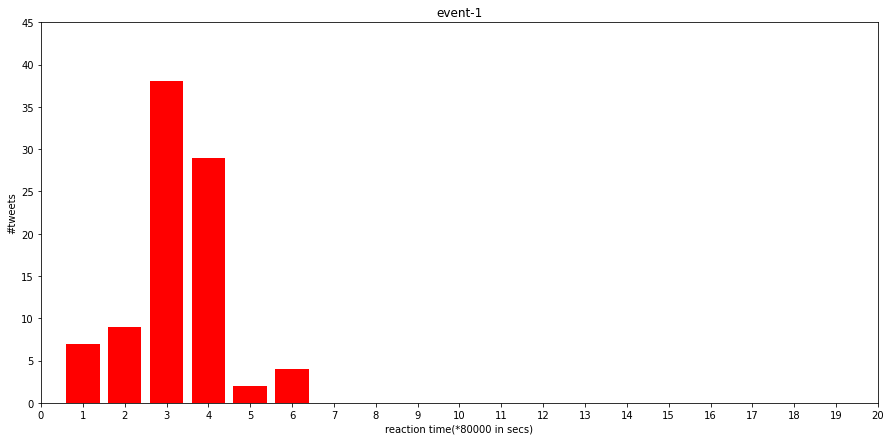

In [ ]:
fig = plt.figure(figsize =(15, 7)) 
plt.bar(x1, counts1, width=0.8, color="red") 
# plt.xlim(0, 600000)
plt.ylim(0, 45)
plt.xlim(0, 20)
plt.xlabel("reaction time(*80000 in secs)") 
plt.ylabel("#tweets") 
plt.title("event-1") 
plt.show() 

# event-2, id: 15367

In [ ]:
event2_reactionTime = reactionTime[90:180]
print(event2_reactionTime)
event2_reactionTime.sort()
print(event2_reactionTime)
print(min(event2_reactionTime), max(event2_reactionTime))
print("diff b/w max n min: ", max(event2_reactionTime)-min(event2_reactionTime))

[193003.0, 224975.0, 459903.0, 453634.0, 256396.0, 281345.0, 269701.0, 251343.0, 251727.0, 192496.0, 251459.0, 242800.0, 248362.0, 296507.0, 262184.0, 79368.0, -169625.0, -18414.0, -26243.0, 16878.0, -52912.0, -163830.0, -148244.0, 78949.0, 77373.0, 79831.0, 60907.0, 18737.0, -171946.0, 79832.0, 16797.0, 76725.0, 7109.0, 68109.0, -171950.0, -162559.0, 14354.0, -170522.0, 65619.0, -168581.0, 60171.0, 65239.0, -10827.0, -17707.0, 75451.0, 13503.0, 75366.0, -104747.0, -156668.0, 78055.0, 54334.0, -15668.0, 51687.0, 78808.0, -171958.0, -1355.0, -170210.0, 67132.0, 73783.0, -111064.0, 97901.0, 160464.0, 153171.0, 202745.0, 87638.0, 149595.0, 175277.0, 148505.0, 20633.0, 50221.0, 103196.0, 103130.0, 177226.0, 42964.0, 31526.0, 128846.0, 285598.0, 80086.0, 109069.0, 83429.0, 156650.0, 241453.0, 146962.0, 38968.0, 253379.0, 107571.0, 125087.0, 33863.0, 104390.0, 19459.0]
[-171958.0, -171950.0, -171946.0, -170522.0, -170210.0, -169625.0, -168581.0, -163830.0, -162559.0, -156668.0, -148244.0, -1

In [ ]:
counts2 = []
x2 = []
c=0
for i in range(30):
  counts2.append(len(list(x for x in event2_reactionTime if c <= x < c+80000)))
  c+=80000
  x2.append(str(i+1))

print(len(x2), x2)
print(len(counts2), counts2)

30 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
30 [32, 16, 7, 13, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


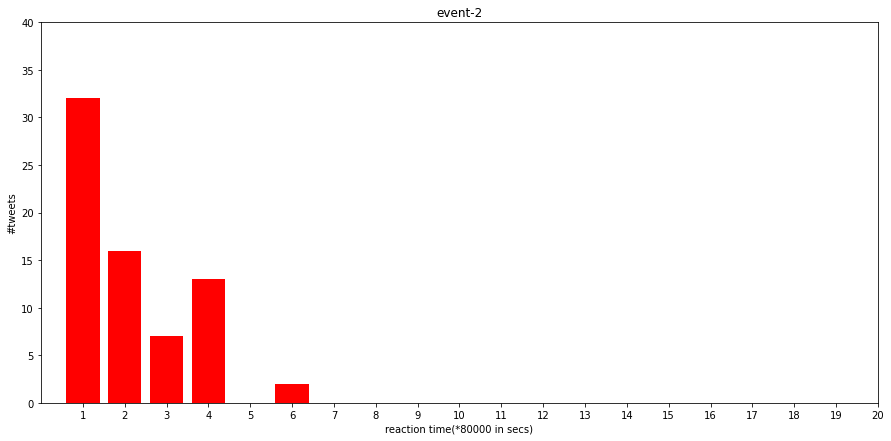

In [ ]:
fig = plt.figure(figsize =(15, 7)) 
plt.bar(x2, counts2, width=0.8, color="red") 
# plt.xlim(0, 600000)
plt.ylim(0, 40)
plt.xlim(-1, 19)
plt.xlabel("reaction time(*80000 in secs)") 
plt.ylabel("#tweets") 
plt.title("event-2") 
plt.show() 

##**event-3, id: 15371**

In [ ]:
event3_reactionTime = reactionTime[271:355]
print(event3_reactionTime)
event3_reactionTime.sort()
print(event3_reactionTime)
print(min(event3_reactionTime), max(event3_reactionTime))
print("diff b/w max n min: ", max(event3_reactionTime)-min(event3_reactionTime))

[-18441177.0, -18434468.0, -18489617.0, -18483045.0, -18495797.0, -18590273.0, -18576805.0, -18575111.0, -18572650.0, -18575863.0, -18571421.0, -18572557.0, -18574888.0, -18572868.0, -18576704.0, 25547377.0, 25541689.0, 25530858.0, 25628894.0, 25671765.0, 25520256.0, 25687321.0, 25529606.0, 26656050.0, 25560866.0, 25696800.0, 25469975.0, 26151889.0, 25972901.0, 26488219.0, 25727015.0, 25512103.0, 25535465.0, 25580822.0, 25576453.0, 25654489.0, 25512608.0, 25662659.0, 26177119.0, 25631026.0, 25535043.0, 25690962.0, 26054982.0, 25689121.0, 25636357.0, 25525831.0, 25806463.0, 25466307.0, 25479130.0, 25623962.0, 25498918.0, 25508388.0, 25642189.0, 25580974.0, 25524285.0, 25524529.0, 25532362.0, 27776213.0, 30878677.0, 39198193.0, 30211606.0, 26958317.0, 33174631.0, 36119607.0, 38171644.0, 27863382.0, 28405029.0, 39107868.0, 31959802.0, 30148772.0, 30115022.0, 37103333.0, 26757870.0, 26826141.0, 30114020.0, 27023267.0, 32632454.0, 27174685.0, 30172092.0, 31833994.0, 30753969.0, 31160590.0, 

In [ ]:
counts3 = [0]
x3 = ['0']
c=0
for i in range(30):
  counts3.append(len(list(x for x in event3_reactionTime if c <= x < c+2500000)))
  c+=2500000
  x3.append(str(i+1))

print(len(x3), x3)
print(len(counts3), counts3)

31 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
31 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 48, 3, 10, 2, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


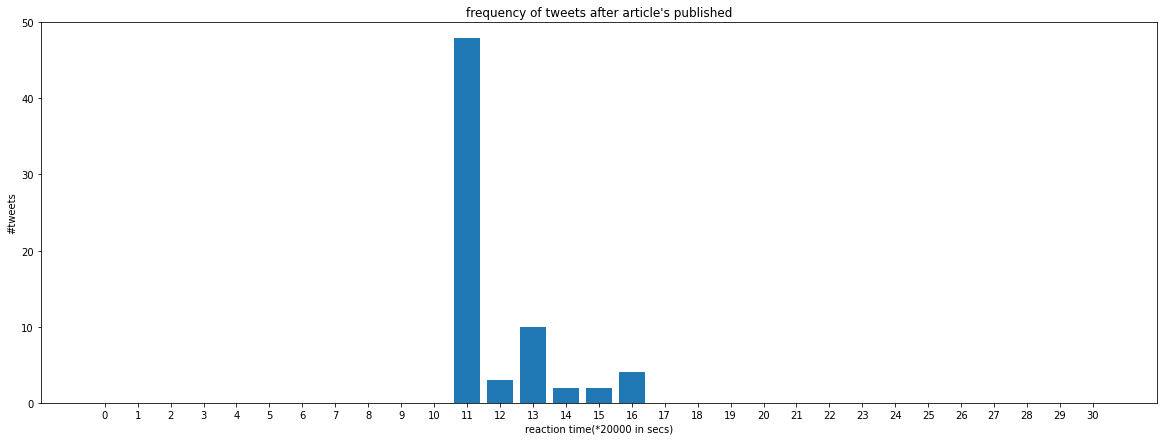

In [ ]:
fig = plt.figure(figsize =(20, 7)) 
plt.bar(x3, counts3, width=0.8) 
# plt.xlim(0, 600000)
plt.ylim(0, 50)
plt.xlabel("reaction time(*20000 in secs)") 
plt.ylabel("#tweets") 
plt.title("frequency of tweets after article's published") 
plt.show() 

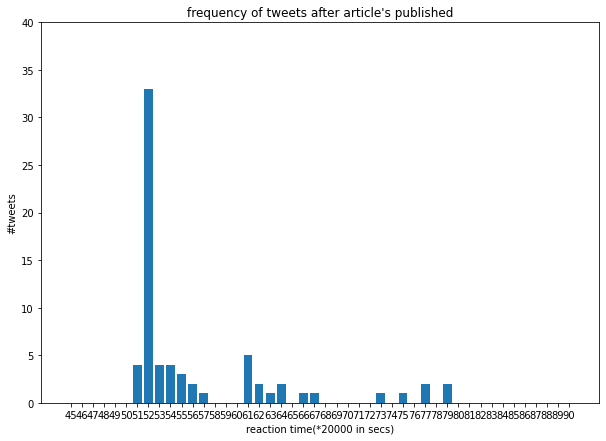

In [ ]:
fig = plt.figure(figsize =(10, 7)) 
plt.bar(x3[45:], counts3[45:], width=0.8) 
# plt.xlim(0, 600000)
plt.ylim(0, 40)
plt.xlabel("reaction time(*20000 in secs)") 
plt.ylabel("#tweets") 
plt.title("frequency of tweets after article's published") 
plt.show() 

##event-4, id: 15267

In [ ]:
event4_reactionTime = reactionTime[355:365]
print(event4_reactionTime)
event4_reactionTime.sort()
print(event4_reactionTime)
print(min(event4_reactionTime), max(event4_reactionTime))
print("diff b/w max n min: ", max(event4_reactionTime)-min(event4_reactionTime))

[32395609.0, 30215434.0, 27131469.0, 31867020.0, 31962125.0, 31941157.0, 32662132.0, 31070297.0, 31966412.0, 32170904.0]
[27131469.0, 30215434.0, 31070297.0, 31867020.0, 31941157.0, 31962125.0, 31966412.0, 32170904.0, 32395609.0, 32662132.0]
27131469.0 32662132.0
diff b/w max n min:  5530663.0


In [ ]:
counts4 = [0]
x4 = ['0']
c=0
for i in range(100):
  counts4.append(len(list(x for x in event4_reactionTime if c <= x < c+1000000)))
  c+=1000000
  x4.append(str(i+1))

print(len(x4), x4)
print(len(counts4), counts4)

101 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100']
101 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


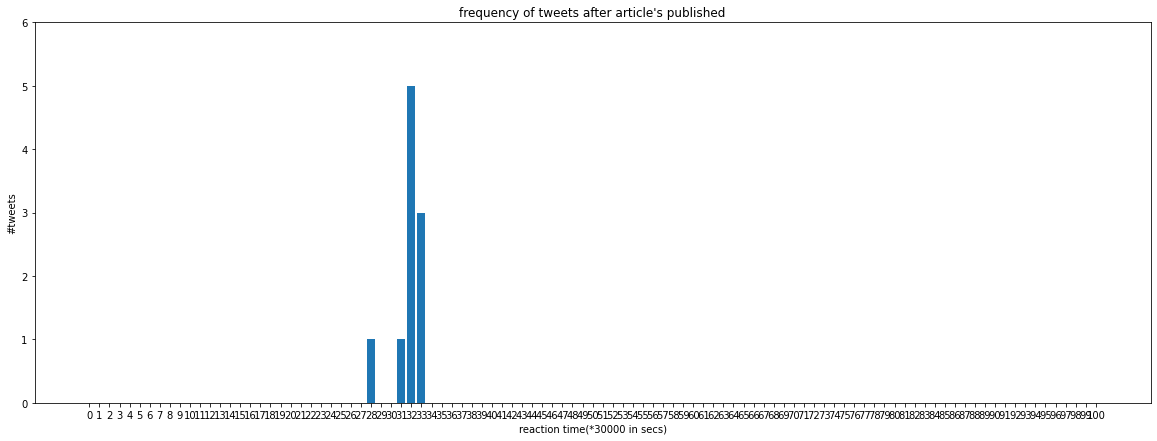

In [ ]:
fig = plt.figure(figsize =(20, 7)) 
plt.bar(x4, counts4, width=0.8) 
# plt.xlim(0, 600000)
plt.ylim(0, 6)
plt.xlabel("reaction time(*30000 in secs)") 
plt.ylabel("#tweets") 
plt.title("frequency of tweets after article's published") 
plt.show() 

##event-5, id: 15052

In [ ]:
event5_reactionTime = reactionTime[479:494]
print(event5_reactionTime)
event5_reactionTime.sort()
print(event5_reactionTime)
print(min(event5_reactionTime), max(event5_reactionTime))
print("diff b/w max n min: ", max(event5_reactionTime)-min(event5_reactionTime))

[-97479.0, 49919.0, -152262.0, -120985.0, -78158.0, -84081.0, -161375.0, -129888.0, -130200.0, -136625.0, -142443.0, -131951.0, -148953.0, -125706.0, -119287.0]
[-161375.0, -152262.0, -148953.0, -142443.0, -136625.0, -131951.0, -130200.0, -129888.0, -125706.0, -120985.0, -119287.0, -97479.0, -84081.0, -78158.0, 49919.0]
-161375.0 49919.0
diff b/w max n min:  211294.0


In [ ]:
counts5 = [0]
x5 = ['0']
c=0
for i in range(70):
  counts5.append(len(list(x for x in event5_reactionTime if c <= x < c+40000)))
  c+=40000
  x5.append(str(i+1))

print(len(x5), x5)
print(len(counts5), counts5)

71 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70']
71 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


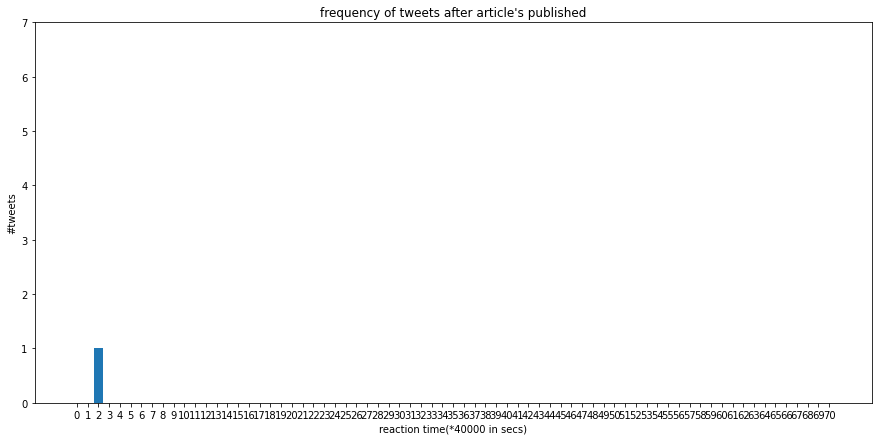

In [ ]:
fig = plt.figure(figsize =(15, 7)) 
plt.bar(x5, counts5, width=0.8) 
# plt.xlim(0, 600000)
plt.ylim(0, 7)
plt.xlabel("reaction time(*40000 in secs)") 
plt.ylabel("#tweets") 
plt.title("frequency of tweets after article's published") 
plt.show() 

##event-6, id: 14328

In [ ]:
event6_reactionTime = reactionTime[494:582]
print(event6_reactionTime)
event6_reactionTime.sort()
event6_reactionTime = event6_reactionTime[2:]
print(event6_reactionTime)
print(min(event6_reactionTime), max(event6_reactionTime))
print("diff b/w max n min: ", max(event6_reactionTime)-min(event6_reactionTime))

[2194.0, 3113.0, 4103.0, 2646.0, 3747.0, 808.0, 2487.0, 2973.0, 3804.0, 3150.0, 3812.0, 3977.0, 2152.0, 3735.0, 2155.0, 4155.0, 2479.0, 4171.0, 2890.0, 2412.0, 4165.0, 3399.0, 3936.0, 3304.0, 3905.0, 2395.0, -49042.0, 2238.0, 802.0, 4112.0, 3684.0, 2423.0, 3349.0, 2298.0, 2569.0, 2418.0, -35588.0, 6014.0, 4773.0, 7859.0, 4554.0, 6131.0, 5157.0, 5181.0, 6723.0, 5179.0, 7290.0, 5209.0, 7469.0, 7270.0, 7357.0, 6395.0, 5963.0, 4371.0, 7731.0, 6323.0, 5843.0, 8048.0, 7823.0, 7706.0, 5170.0, 7404.0, 7188.0, 7704.0, 7766.0, 6454.0, 6401.0, 7737.0, 7455.0, 6422.0, 6582.0, 4505.0, 7488.0, 4720.0, 5513.0, 5394.0, 4948.0, 7006.0, 4493.0, 6271.0, 7002.0, 6525.0, 5511.0, 7255.0, 5467.0, 6927.0, 6372.0, 4218.0]
[802.0, 808.0, 2152.0, 2155.0, 2194.0, 2238.0, 2298.0, 2395.0, 2412.0, 2418.0, 2423.0, 2479.0, 2487.0, 2569.0, 2646.0, 2890.0, 2973.0, 3113.0, 3150.0, 3304.0, 3349.0, 3399.0, 3684.0, 3735.0, 3747.0, 3804.0, 3812.0, 3905.0, 3936.0, 3977.0, 4103.0, 4112.0, 4155.0, 4165.0, 4171.0, 4218.0, 4371.0

In [ ]:
counts6 = [0]
x6 = ['0']
c=0
for i in range(20):
  counts6.append(len(list(x for x in event6_reactionTime if c <= x < c+1000)))
  c+=1000
  x6.append(str(i+1))

print(len(x6), x6)
print(len(counts6), counts6)

21 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
21 [0, 2, 0, 15, 13, 13, 11, 13, 18, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


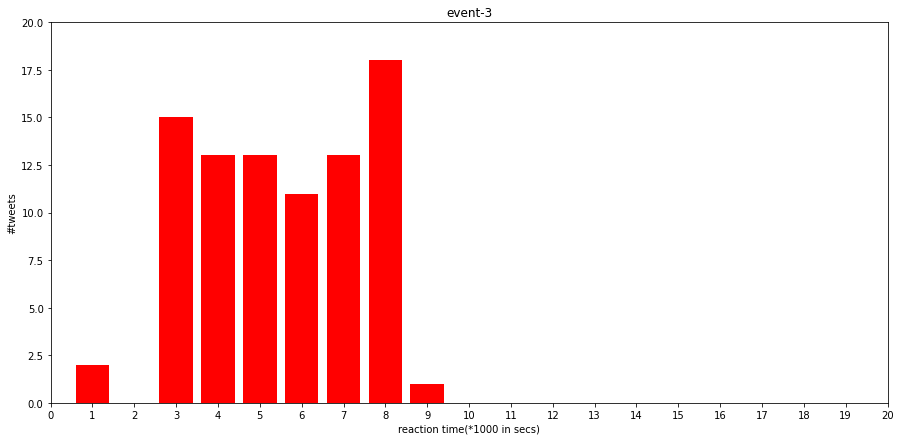

In [ ]:
fig = plt.figure(figsize =(15, 7)) 
plt.bar(x6, counts6, width=0.8, color="red") 
# plt.xlim(0, 600000)
plt.ylim(0, 20)
plt.xlim(0, 20)
plt.xlabel("reaction time(*1000 in secs)") 
plt.ylabel("#tweets") 
plt.title("event-3") 
plt.show() 

##event-7, id: 14328

In [ ]:
event7_reactionTime = reactionTime[582:667]
print(event7_reactionTime)
event7_reactionTime.sort()
print(event7_reactionTime)
print(min(event7_reactionTime), max(event7_reactionTime))
print("diff b/w max n min: ", max(event7_reactionTime)-min(event7_reactionTime))

[135929.0, 64304.0, 33558.0, 185580.0, 33551.0, 189719.0, 33571.0, 239999.0, 113010.0, 229497.0, 126865.0, 204276.0, 240467.0, 33560.0, 54821.0, 42229.0, 34696.0, 43069.0, 244992.0, 33047.0, 110401.0, 231059.0, 33556.0, 246210.0, 218729.0, 232016.0, 112621.0, 191573.0, 33195.0, 223049.0, 185848.0, 239204.0, 33046.0, 44978.0, 218774.0, 30106.0, 47813.0, 21380.0, 32326.0, 33566.0, 233324.0, 42065.0, 200617.0, 233913.0, 36467.0, 33545.0, 215881.0, 222779.0, 84390.0, 214292.0, 224826.0, 217030.0, 248276.0, 35083.0, 239532.0, 210727.0, 221314.0, 208982.0, 218187.0, 219378.0, 181679.0, 36047.0, 33568.0, 22264.0, 212946.0, 237114.0, 58493.0, 32812.0, 217322.0, 27092.0, 31129.0, 232987.0, 228067.0, 230905.0, 218129.0, 33553.0, 33528.0, 80407.0, 33564.0, 33547.0, 33044.0, 31129.0, 183091.0, 216229.0, 20906.0]
[20906.0, 21380.0, 22264.0, 27092.0, 30106.0, 31129.0, 31129.0, 32326.0, 32812.0, 33044.0, 33046.0, 33047.0, 33195.0, 33528.0, 33545.0, 33547.0, 33551.0, 33553.0, 33556.0, 33558.0, 33560.0

In [ ]:
counts7 = [0]
x7 = ['0']
c=0
for i in range(20):
  counts7.append(len(list(x for x in event7_reactionTime if c <= x < c+20000)))
  c+=20000
  x7.append(str(i+1))

print(len(x7), x7)
print(len(counts7), counts7)

21 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
21 [0, 0, 29, 7, 1, 2, 3, 2, 0, 0, 6, 15, 16, 4, 0, 0, 0, 0, 0, 0, 0]


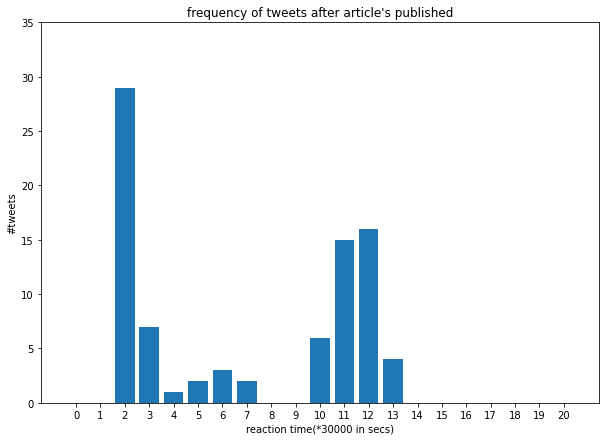

In [ ]:
fig = plt.figure(figsize =(10, 7)) 
plt.bar(x7, counts7, width=0.8) 
# plt.xlim(0, 600000)
plt.ylim(0, 35)
plt.xlabel("reaction time(*30000 in secs)") 
plt.ylabel("#tweets") 
plt.title("frequency of tweets after article's published") 
plt.show() 

##event-8, id: 14235

In [ ]:
event8_reactionTime = reactionTime[790:868]
print(event8_reactionTime)
event8_reactionTime.sort()
print(event8_reactionTime)
print(min(event8_reactionTime), max(event8_reactionTime))
print("diff b/w max n min: ", max(event8_reactionTime)-min(event8_reactionTime))

[348217.0, 764551.0, 497017.0, 672123.0, 480220.0, 479893.0, 747658.0, 485425.0, 550496.0, 406052.0, 563505.0, 480319.0, 526047.0, 589273.0, 518739.0, 590000.0, 900190.0, 508727.0, 558392.0, 380231.0, 415634.0, 727304.0, 671297.0, 333193.0, 393421.0, 5850322.0, 391848.0, 494330.0, 565188.0, 764536.0, 532894.0, 758104.0, 656040.0, 590152.0, 449299.0, 597409.0, 481782.0, 564312.0, 661893.0, 659079.0, 562304.0, 644965.0, 584816.0, 680524.0, 761170.0, 470744.0, 459039.0, 574233.0, 844410.0, 589395.0, 347662.0, 736979.0, 330190.0, 589961.0, 445942.0, 493509.0, 537891.0, 468193.0, 658668.0, 952083.0, 385996.0, 589213.0, 566879.0, 698224.0, 558490.0, 1121692.0, 589156.0, 470736.0, 983836.0, 684734.0, 568049.0, 589873.0, 745008.0, 464968.0, 589657.0, 589816.0, 589716.0, 717525.0]
[330190.0, 333193.0, 347662.0, 348217.0, 380231.0, 385996.0, 391848.0, 393421.0, 406052.0, 415634.0, 445942.0, 449299.0, 459039.0, 464968.0, 468193.0, 470736.0, 470744.0, 479893.0, 480220.0, 480319.0, 481782.0, 485425

In [ ]:
counts8 = [0]
x8 = ['0']
c=0
for i in range(30):
  counts8.append(len(list(x for x in event8_reactionTime if c <= x < c+90000)))
  c+=90000
  x8.append(str(i+1))

print(len(x8), x8)
print(len(counts8), counts8)

31 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
31 [0, 0, 0, 0, 4, 8, 18, 23, 11, 8, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


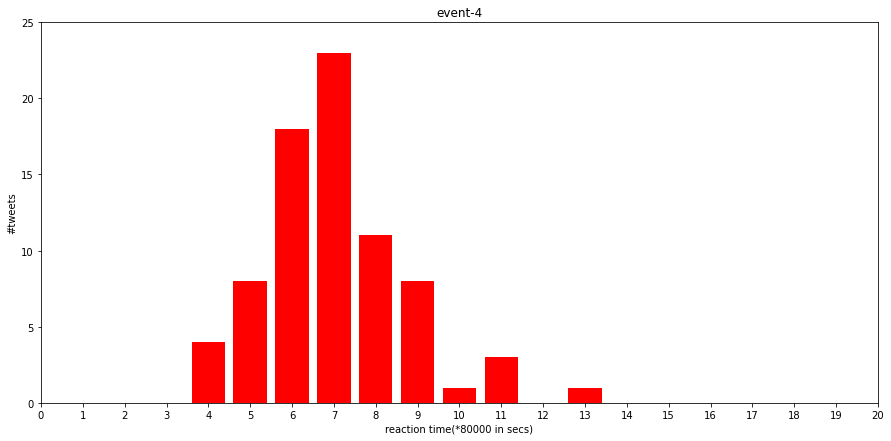

In [ ]:
fig = plt.figure(figsize =(15, 7)) 
plt.bar(x8, counts8, width=0.8, color="red") 
# plt.xlim(0, 600000)
plt.ylim(0, 25)
plt.xlim(0, 20)
plt.xlabel("reaction time(*80000 in secs)") 
plt.ylabel("#tweets") 
plt.title("event-4") 
plt.show() 

##event-9, id: 13806

In [ ]:
event9_reactionTime = reactionTime[1110:1206]
print(event9_reactionTime)
event9_reactionTime.sort()
print(len(event9_reactionTime), event9_reactionTime)
print(min(event9_reactionTime), max(event9_reactionTime))
print("diff b/w max n min: ", max(event9_reactionTime)-min(event9_reactionTime))

[110438.0, 85414.0, 107769.0, 89351.0, 95137.0, 99747.0, 56288.0, 92596.0, 95716.0, 107986.0, 110960.0, 98030.0, 105754.0, 43121.0, 90181.0, 92548.0, 49615.0, 109748.0, 97653.0, 80091.0, 98437.0, 75988.0, 96271.0, 88871.0, 97858.0, 101252.0, 98135.0, 87912.0, 90198.0, 93927.0, 101136.0, 89262.0, 98283.0, 100566.0, 96633.0, 90961.0, 86268.0, 111529.0, 107217.0, 98796.0, 103275.0, 105418.0, 105717.0, 89912.0, 65199.0, 46834.0, 96479.0, 107565.0, 89546.0, 102359.0, 101381.0, 105172.0, 108144.0, 97425.0, 96480.0, 77583.0, 111990.0, 93950.0, 102253.0, 109926.0, 92054.0, 80285.0, 91451.0, 103200.0, 108986.0, 53372.0, 93050.0, 108156.0, 101772.0, 102152.0, 103360.0, 88963.0, 81793.0, 103983.0, 69851.0, 98176.0, 61045.0, 72291.0, 112211.0, 96607.0, 89315.0, 103610.0, 90443.0, 90546.0, 96956.0, 96733.0, 97589.0, 106802.0, 45537.0, 99743.0, 112247.0, 95758.0, 104817.0, 84276.0, 88276.0, 34285.0]
96 [34285.0, 43121.0, 45537.0, 46834.0, 49615.0, 53372.0, 56288.0, 61045.0, 65199.0, 69851.0, 72291.0

In [ ]:
counts9 = [0]
x9 = ['0']
c=0
for i in range(30):
  counts9.append(len(list(x for x in event9_reactionTime if c <= x < c+7000)))
  c+=7000
  x9.append(str(i+1))

print(len(x9), x9)
print(len(counts9), counts9)

31 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
31 [0, 0, 0, 0, 0, 1, 0, 3, 2, 2, 2, 2, 4, 17, 21, 22, 18, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


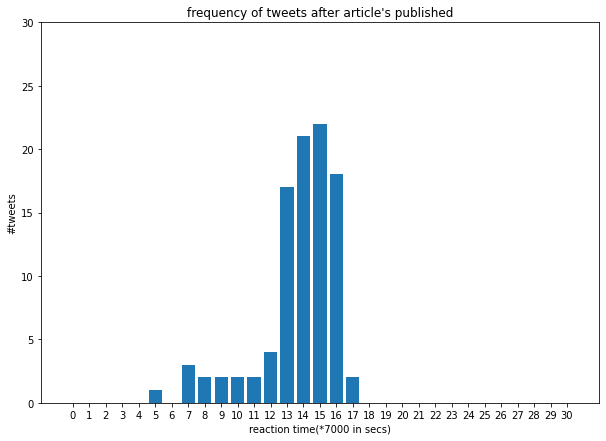

In [ ]:
fig = plt.figure(figsize =(10, 7)) 
plt.bar(x9, counts9, width=0.8) 
# plt.xlim(0, 600000)
plt.ylim(0, 30)
plt.xlabel("reaction time(*7000 in secs)") 
plt.ylabel("#tweets") 
plt.title("frequency of tweets after article's published") 
plt.show() 

#real events

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/Time_Analysis_Real.csv')
reactionTime_R = (df2['art_tweet_time'].tolist())
print(len(reactionTime_R), reactionTime_R)

143 [319369034.0, 319367109.0, 319366107.0, 319366297.0, 319365930.0, 319367485.0, 319367109.0, 319368585.0, 319365926.0, 319366958.0, 319369029.0, 319367914.0, 319367708.0, 319368420.0, 319368854.0, 319370765.0, 319370763.0, 319365905.0, 319369226.0, 319371156.0, 319369383.0, 319367448.0, 319368640.0, 319365931.0, 319365875.0, 319369383.0, 319369818.0, 319369040.0, 319368679.0, 319371544.0, 319371252.0, 319365873.0, 319370769.0, 319370507.0, 319370769.0, 319365865.0, 319369965.0, 319368449.0, 319378145.0, 319371664.0, 319372619.0, 319379646.0, 319375693.0, 319379131.0, 319379567.0, 319371593.0, 319374186.0, 319376503.0, 319375132.0, 319376327.0, 319371726.0, 319375773.0, 319372797.0, 319374785.0, 319371673.0, 319373194.0, 319378161.0, 319373148.0, 319376339.0, 319372070.0, 319373998.0, 319379925.0, 319372083.0, 319379644.0, 319374010.0, 319372769.0, 319376528.0, 319380166.0, 319377824.0, 319372512.0, 319371766.0, 319372263.0, 319371963.0, 319374740.0, 319377867.0, 319372565.0, 3193725

#real event-1, id: 513

In [ ]:
event1_reactionTime_R = reactionTime_R[0:87]
print(event1_reactionTime_R)
event1_reactionTime_R.sort()
print(len(event1_reactionTime_R), event1_reactionTime_R)
print(min(event1_reactionTime_R), max(event1_reactionTime_R))
print("diff b/w max n min: ", max(event1_reactionTime_R)-min(event1_reactionTime_R))

[319369034.0, 319367109.0, 319366107.0, 319366297.0, 319365930.0, 319367485.0, 319367109.0, 319368585.0, 319365926.0, 319366958.0, 319369029.0, 319367914.0, 319367708.0, 319368420.0, 319368854.0, 319370765.0, 319370763.0, 319365905.0, 319369226.0, 319371156.0, 319369383.0, 319367448.0, 319368640.0, 319365931.0, 319365875.0, 319369383.0, 319369818.0, 319369040.0, 319368679.0, 319371544.0, 319371252.0, 319365873.0, 319370769.0, 319370507.0, 319370769.0, 319365865.0, 319369965.0, 319368449.0, 319378145.0, 319371664.0, 319372619.0, 319379646.0, 319375693.0, 319379131.0, 319379567.0, 319371593.0, 319374186.0, 319376503.0, 319375132.0, 319376327.0, 319371726.0, 319375773.0, 319372797.0, 319374785.0, 319371673.0, 319373194.0, 319378161.0, 319373148.0, 319376339.0, 319372070.0, 319373998.0, 319379925.0, 319372083.0, 319379644.0, 319374010.0, 319372769.0, 319376528.0, 319380166.0, 319377824.0, 319372512.0, 319371766.0, 319372263.0, 319371963.0, 319374740.0, 319377867.0, 319372565.0, 319372541.0

In [ ]:
counts1r = [0]
x1r = ['0']
c=0
for i in range(50):
  counts1r.append(len(list(x for x in event1_reactionTime_R if c <= x < c+18000000)))
  c+=18000000
  x1r.append(str(i+1))

print(len(x1r), x1r)
print(len(counts1r), counts1r)

51 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50']
51 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 87, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


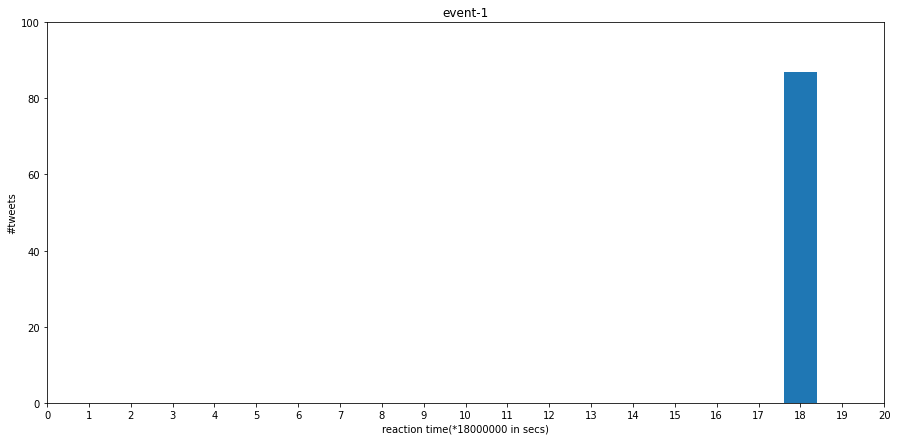

In [ ]:
fig = plt.figure(figsize =(15, 7)) 
plt.bar(x1r, counts1r, width=0.8) 
# plt.xlim(0, 600000)
plt.ylim(0, 100)
plt.xlim(0,20)
plt.xlabel("reaction time(*18000000 in secs)") 
plt.ylabel("#tweets") 
plt.title("event-1") 
plt.show() 

#real event-2, id: 12945

In [ ]:
event2_reactionTime_R = reactionTime_R[87:]
print(event2_reactionTime_R)
event2_reactionTime_R.sort()
event2_reactionTime_R = event2_reactionTime_R[15:]
print(len(event2_reactionTime_R), event2_reactionTime_R)
print(min(event2_reactionTime_R), max(event2_reactionTime_R))
print("diff b/w max n min: ", max(event2_reactionTime_R)-min(event2_reactionTime_R))

[102996.0, 562250.0, -7944.0, 9137.0, 51561.0, -15032.0, 97181.0, 8047.0, 18351.0, 1369389.0, 179445.0, 87395.0, 48158.0, 10058.0, 127031.0, 52517.0, 591276.0, 4051622.0, -18398.0, -18456.0, 70779.0, 116300.0, 7048.0, 93053.0, 70117.0, 409906.0, -17830.0, 47341.0, 89219.0, 107609.0, 102024.0, 15503.0, -9545.0, 1233621.0, 113542.0, 65453.0, 15736.0, -14197.0, 33199044.0, -9847.0, -14376.0, 1621958.0, 8747.0, 96042.0, 8408.0, -15492.0, 1884047.0, -10523.0, 82133.0, -14861.0, 345128.0, -14572.0, -13014.0, 118562.0, 1059659.0, -67.0]
41 [7048.0, 8047.0, 8408.0, 8747.0, 9137.0, 10058.0, 15503.0, 15736.0, 18351.0, 47341.0, 48158.0, 51561.0, 52517.0, 65453.0, 70117.0, 70779.0, 82133.0, 87395.0, 89219.0, 93053.0, 96042.0, 97181.0, 102024.0, 102996.0, 107609.0, 113542.0, 116300.0, 118562.0, 127031.0, 179445.0, 345128.0, 409906.0, 562250.0, 591276.0, 1059659.0, 1233621.0, 1369389.0, 1621958.0, 1884047.0, 4051622.0, 33199044.0]
7048.0 33199044.0
diff b/w max n min:  33191996.0


In [ ]:
counts2r = [0]
x2r = ['0']
c=0
for i in range(50):
  counts2r.append(len(list(x for x in event2_reactionTime_R if c <= x < c+40000)))
  c+=40000
  x2r.append(str(i+1))

print(len(x2r), x2r)
print(len(counts2r), counts2r)

51 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50']
51 [0, 9, 7, 12, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]


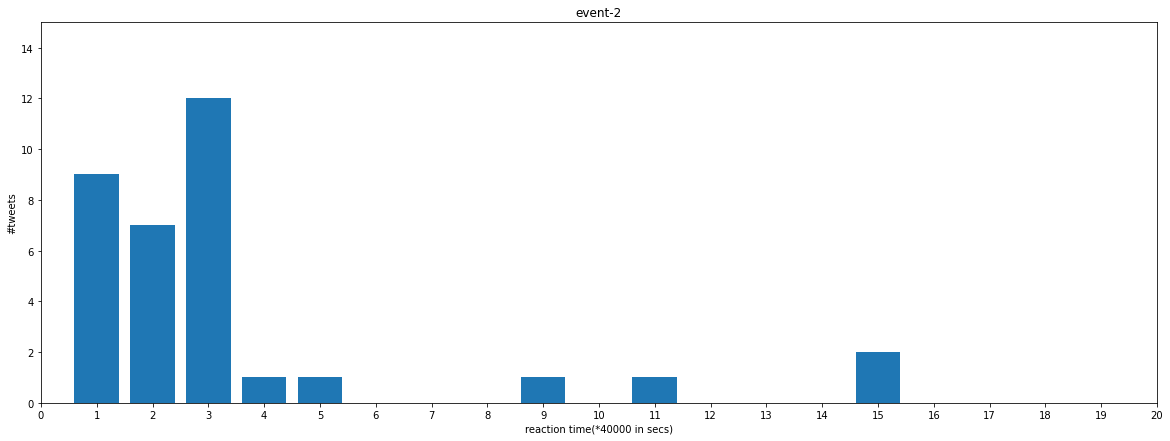

In [ ]:
fig = plt.figure(figsize =(20, 7)) 
plt.bar(x2r, counts2r, width=0.8) 
# plt.xlim(0, 600000)
plt.ylim(0, 15)
plt.xlim(0, 20)
plt.xlabel("reaction time(*40000 in secs)") 
plt.ylabel("#tweets") 
plt.title("event-2") 
plt.show() 

#**Modelling and selection of user profile features**

In [ ]:
import json
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/time_text_fol.csv', index_col = [0])

In [ ]:
df

,Tweet_id,User_id,Time_sec,senti,PERSON,NORP,GPE,ORG,Verb count,Noun count,Adjective count,followers_count,friends_count,statuses_count,fol2frnd,label_y,predicted_label,predicted_label_2
0,767896876,13413,40791306.0,0.000000,2.0,0.0,2.0,0.0,3.0,5.0,1.0,5379,2578,112263,2.08650,0,0,0
1,780586514698866688,614853,306654089.0,-0.022222,1.0,0.0,1.0,0.0,3.0,6.0,4.0,553,319,39967,1.73354,0,0,0
2,1039118159,697523,58747767.0,0.000000,0.0,0.0,0.0,0.0,1.0,4.0,0.0,2649,424,29123,6.24764,0,0,0
3,698653401199017984,755019,284689656.0,0.000000,0.0,0.0,1.0,1.0,0.0,3.0,2.0,6190,2350,36543,2.63404,0,0,0
4,784541765353209857,801607,303193127.0,0.500000,0.0,0.0,1.0,0.0,5.0,8.0,3.0,2646,265,41416,9.98491,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,1015312780981952513,1011743573769965570,850965.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,6,153,189,0.03922,1,1,1
4593,1015314005399932932,1013474576251092993,438554.0,-0.183333,0.0,0.0,2.0,0.0,4.0,7.0,1.0,224,290,3310,0.77241,1,1,1
4594,1015231479553675264,1013941418417688582,307574.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,2771,3029,1284,0.91482,1,1,1
4595,1015102514956525568,1014713682608222209,92704.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0,3,17,0.00000,1,1,1


In [ ]:
df.head()

,Tweet_id,User_id,Time_sec,senti,PERSON,NORP,GPE,ORG,Verb count,Noun count,Adjective count,followers_count,friends_count,statuses_count,fol2frnd,label_y,predicted_label,predicted_label_2
0,767896876,13413,40791306.0,0.000000,2.0,0.0,2.0,0.0,3.0,5.0,1.0,5379,2578,112263,2.08650,0,0,0
1,780586514698866688,614853,306654089.0,-0.022222,1.0,0.0,1.0,0.0,3.0,6.0,4.0,553,319,39967,1.73354,0,0,0
2,1039118159,697523,58747767.0,0.000000,0.0,0.0,0.0,0.0,1.0,4.0,0.0,2649,424,29123,6.24764,0,0,0
3,698653401199017984,755019,284689656.0,0.000000,0.0,0.0,1.0,1.0,0.0,3.0,2.0,6190,2350,36543,2.63404,0,0,0
4,784541765353209857,801607,303193127.0,0.500000,0.0,0.0,1.0,0.0,5.0,8.0,3.0,2646,265,41416,9.98491,0,0,0


In [ ]:
X = df
X = X.drop(columns=['Tweet_id', 'User_id', 'label_y', 'predicted_label', 'predicted_label_2'])
Y = df["label_y"]

In [ ]:
X.head()

,Time_sec,senti,PERSON,NORP,GPE,ORG,Verb count,Noun count,Adjective count,followers_count,friends_count,statuses_count,fol2frnd
0,40791306.0,0.000000,2.0,0.0,2.0,0.0,3.0,5.0,1.0,5379,2578,112263,2.08650
1,306654089.0,-0.022222,1.0,0.0,1.0,0.0,3.0,6.0,4.0,553,319,39967,1.73354
2,58747767.0,0.000000,0.0,0.0,0.0,0.0,1.0,4.0,0.0,2649,424,29123,6.24764
3,284689656.0,0.000000,0.0,0.0,1.0,1.0,0.0,3.0,2.0,6190,2350,36543,2.63404
4,303193127.0,0.500000,0.0,0.0,1.0,0.0,5.0,8.0,3.0,2646,265,41416,9.98491


In [ ]:
X_userProfile = X.drop(columns=['Time_sec', 'senti', 'PERSON', 'NORP', 'GPE', 'ORG', 'Noun count', 'Verb count', 'Adjective count'])
X_userProfile.head()

,followers_count,friends_count,statuses_count,fol2frnd
0,5379,2578,112263,2.08650
1,553,319,39967,1.73354
2,2649,424,29123,6.24764
3,6190,2350,36543,2.63404
4,2646,265,41416,9.98491


#followers_count

In [ ]:
X_fol = X_userProfile.drop(columns=['friends_count', 'statuses_count', 'fol2frnd'])
X_fol.head()

,followers_count
0,5379
1,553
2,2649
3,6190
4,2646


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_fol,Y, test_size=0.20, random_state=30)

###### SVC

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train, y_train)

0.6083763937992929

In [ ]:
model2.score(X_test, y_test)

0.6380434782608696

#####Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=4, random_state=42)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.6298612999728039

In [ ]:
model4.score(X_test, y_test)

0.6445652173913043

#####Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.6415556159912973

In [ ]:
model5.score(X_test,y_test)

0.65

##### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train, y_train)

0.6344846342126734

In [ ]:
model7.score(X_test, y_test)

0.6478260869565218

##### XgBoost Classifier

In [ ]:
import xgboost as xgb
model8 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 1, max_depth = 5, alpha = 10, n_estimators = 2)
model8.fit(X_train,y_train)

[18:30:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=2,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
model8.score(X_train, y_train)

0.10034710583040074

In [ ]:
model8.score(X_test, y_test)

0.01217575810318361

# friends_count

In [ ]:
X_frnd = X_userProfile.drop(columns=['followers_count', 'statuses_count', 'fol2frnd'])
X_frnd.head()

,friends_count
0,2578
1,319
2,424
3,2350
4,265


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_frnd,Y, test_size=0.20, random_state=30)

##### Support Vector Classifier

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train, y_train)

0.6110960021756867

In [ ]:
model2.score(X_test, y_test)

0.6413043478260869

##### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
model4 = RandomForestClassifier(max_depth=4, random_state=42)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.6323089475115583

In [ ]:
model4.score(X_test, y_test)

0.6543478260869565

##### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.6331248300244765

In [ ]:
model5.score(X_test,y_test)

0.6456521739130435

##### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train, y_train)

0.6336687516997552

In [ ]:
model7.score(X_test, y_test)

0.6380434782608696

##### XgBoost Classifier

In [ ]:
import xgboost as xgb
model8 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 1, max_depth = 5, alpha = 10, n_estimators = 2)
model8.fit(X_train,y_train)

[18:16:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=2,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
model8.score(X_train, y_train)

0.07686192020739957

In [ ]:
model8.score(X_test, y_test)

0.029643878667713452

# statuses_count

In [ ]:
X_status = X_userProfile.drop(columns=['followers_count', 'friends_count', 'fol2frnd'])
X_status.head()

,statuses_count
0,112263
1,39967
2,29123
3,36543
4,41416


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_status,Y, test_size=0.20, random_state=30)

##### Support Vector Classifier

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train, y_train)

0.6140875713897199

In [ ]:
model2.score(X_test, y_test)

0.6445652173913043

##### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=4, random_state=0)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.6290454174598857

In [ ]:
model4.score(X_test, y_test)

0.6467391304347826

##### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.6287734566222464

In [ ]:
model5.score(X_test,y_test)

0.6489130434782608

##### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train, y_train)

0.6293173782975252

In [ ]:
model7.score(X_test, y_test)

0.6456521739130435

##### XgBoost Classifier

In [ ]:
import xgboost as xgb
model8 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 1, max_depth = 5, alpha = 10, n_estimators = 2)
model8.fit(X_train,y_train)

[18:18:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=2,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
model8.score(X_train, y_train)

0.08255646612191248

In [ ]:
model8.score(X_test, y_test)

0.008646477744876035

# fol2frnd

In [ ]:
X_fol2frnd = X_userProfile.drop(columns=['followers_count', 'friends_count', 'statuses_count'])
X_fol2frnd.head()

,fol2frnd
0,2.08650
1,1.73354
2,6.24764
3,2.63404
4,9.98491


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_fol2frnd,Y, test_size=0.20, random_state=30)

##### Support Vector Classifier

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train, y_train)

0.620614631493065

In [ ]:
model2.score(X_test, y_test)

0.6402173913043478

##### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=4, random_state=0)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.6970356268697308

In [ ]:
model4.score(X_test, y_test)

0.7141304347826087

##### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.7016589611096002

In [ ]:
model5.score(X_test,y_test)

0.7260869565217392

##### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train, y_train)

0.7032907261354365

In [ ]:
model7.score(X_test, y_test)

0.7260869565217392

##### XgBoost Classifier

In [ ]:
import xgboost as xgb
model8 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 1, max_depth = 5, alpha = 10, n_estimators =5)
model8.fit(X_train,y_train)

[18:20:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=5,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
model8.score(X_train, y_train)

0.2436211729826737

In [ ]:
model8.score(X_test, y_test)

0.15013726291899188

Xgboost classifier is not used further considering it's performance.

# followers_count, friends_count

In [ ]:
X_folFrnd = X_userProfile.drop(columns=['statuses_count', 'fol2frnd'])
X_folFrnd.head()

,followers_count,friends_count
0,5379,2578
1,553,319
2,2649,424
3,6190,2350
4,2646,265


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_folFrnd,Y, test_size=0.20, random_state=30)

##### Support Vector Classifier

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train, y_train)

0.6143595322273593

In [ ]:
model2.score(X_test, y_test)

0.6445652173913043

##### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
model4 = RandomForestClassifier(max_depth=4, random_state=0)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.6741909165080229

In [ ]:
model4.score(X_test, y_test)

0.6902173913043478

##### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.7070981778623878

In [ ]:
model5.score(X_test,y_test)

0.7206521739130435

##### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train, y_train)

0.7049224911612728

In [ ]:
model7.score(X_test, y_test)

0.717391304347826

# statuses_count, fol2frnd

In [ ]:
X_statusFol2frnd = X_userProfile.drop(columns=['followers_count', 'friends_count'])
X_statusFol2frnd.head()

,statuses_count,fol2frnd
0,112263,2.08650
1,39967,1.73354
2,29123,6.24764
3,36543,2.63404
4,41416,9.98491


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_statusFol2frnd,Y, test_size=0.20, random_state=30)

##### Support Vector Classifier

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train, y_train)

0.6295893391351646

In [ ]:
model2.score(X_test, y_test)

0.6489130434782608

##### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=4, random_state=0)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.704378569485994

In [ ]:
model4.score(X_test, y_test)

0.7293478260869565

##### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.7057383736741909

In [ ]:
model5.score(X_test,y_test)

0.7347826086956522

##### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train, y_train)

0.7098177862387817

In [ ]:
model7.score(X_test, y_test)

0.7369565217391304

# followers_count, fol2frnd

In [ ]:
X_folFol2frnd = X_userProfile.drop(columns=['friends_count', 'statuses_count'])
X_folFol2frnd.head()

,followers_count,fol2frnd
0,5379,2.08650
1,553,1.73354
2,2649,6.24764
3,6190,2.63404
4,2646,9.98491


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_folFol2frnd,Y, test_size=0.20, random_state=30)

##### Support Vector Classifier

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train, y_train)

0.6208865923307044

In [ ]:
model2.score(X_test, y_test)

0.6423913043478261

##### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
model4 = RandomForestClassifier(max_depth=4, random_state=0)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.7103617079140604

In [ ]:
model4.score(X_test, y_test)

0.725

##### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.7027468044601577

In [ ]:
model5.score(X_test,y_test)

0.7282608695652174

##### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train, y_train)

0.702202882784879

In [ ]:
model7.score(X_test, y_test)

0.7271739130434782

# friends_count, fol2frnd

In [ ]:
X_frndFol2frnd = X_userProfile.drop(columns=['followers_count', 'statuses_count'])
X_frndFol2frnd.head()

,friends_count,fol2frnd
0,2578,2.08650
1,319,1.73354
2,424,6.24764
3,2350,2.63404
4,265,9.98491


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_frndFol2frnd,Y, test_size=0.20, random_state=30)

##### Support Vector Classifier

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train, y_train)

0.628501495784607

In [ ]:
model2.score(X_test, y_test)

0.6478260869565218

##### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
model4 = RandomForestClassifier(max_depth=4, random_state=0)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.7027468044601577

In [ ]:
model4.score(X_test, y_test)

0.7260869565217392

##### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.7079140603753059

In [ ]:
model5.score(X_test,y_test)

0.7282608695652174

##### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train, y_train)

0.7046505303236335

In [ ]:
model7.score(X_test, y_test)

0.7271739130434782

# followers_count, friends_count, fol2frnd

In [ ]:
X_folFrndFol2frnd = X_userProfile.drop(columns=['statuses_count'])
X_folFrndFol2frnd.head()

,followers_count,friends_count,fol2frnd
0,5379,2578,2.08650
1,553,319,1.73354
2,2649,424,6.24764
3,6190,2350,2.63404
4,2646,265,9.98491


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_folFrndFol2frnd,Y, test_size=0.20, random_state=30)

##### Support Vector Classifier

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train, y_train)

0.6268697307587707

In [ ]:
model2.score(X_test, y_test)

0.6478260869565218

##### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
model4 = RandomForestClassifier(max_depth=4, random_state=0)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.7098177862387817

In [ ]:
model4.score(X_test, y_test)

0.725

##### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.7095458254011422

In [ ]:
model5.score(X_test,y_test)

0.7315217391304348

##### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train, y_train)

0.7106336687516998

In [ ]:
model7.score(X_test, y_test)

0.7293478260869565

# followers_count, friends_count, statuses_count

In [ ]:
X_folFrndStatus = X_userProfile.drop(columns=['fol2frnd'])
X_folFrndStatus.head()

,followers_count,friends_count,statuses_count
0,5379,2578,112263
1,553,319,39967
2,2649,424,29123
3,6190,2350,36543
4,2646,265,41416


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_folFrndStatus,Y, test_size=0.20, random_state=30)

##### Support Vector Classifier

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train, y_train)

0.6192548273048681

In [ ]:
model2.score(X_test, y_test)

0.6521739130434783

##### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
model4 = RandomForestClassifier(max_depth=4, random_state=0)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.6711993472939897

In [ ]:
model4.score(X_test, y_test)

0.6793478260869565

##### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.7253195539842263

In [ ]:
model5.score(X_test,y_test)

0.7206521739130435

##### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train, y_train)

0.717976611367963

In [ ]:
model7.score(X_test, y_test)

0.7130434782608696

# followers_count, friends_count, statuses_count, fol2frnd

In [ ]:
X_folFrndStatusFol2frnd = X_userProfile
X_folFrndStatusFol2frnd.head()

,followers_count,friends_count,statuses_count,fol2frnd
0,5379,2578,112263,2.08650
1,553,319,39967,1.73354
2,2649,424,29123,6.24764
3,6190,2350,36543,2.63404
4,2646,265,41416,9.98491


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_folFrndStatusFol2frnd,Y, test_size=0.20, random_state=30)

##### Support Vector Classifier

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train, y_train)

0.6323089475115583

In [ ]:
model2.score(X_test, y_test)

0.6565217391304348

##### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
model4 = RandomForestClassifier(max_depth=4, random_state=0)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.7138971988033723

In [ ]:
model4.score(X_test, y_test)

0.7315217391304348

##### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.7255915148218657

In [ ]:
model5.score(X_test,y_test)

0.7423913043478261

##### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train, y_train)

0.7204242589067175

In [ ]:
model7.score(X_test, y_test)

0.7369565217391304

**Chosen features:** followers_count, friends_count, fol2frnd
---
statuses_count is not considered as it makes no difference in the accuarcy of the classifiers.

#**Modelling over the combined features (time, text & user profiles)**

The dataset before adding the feature #followers:#friends, is considered.
A few chosen Machine Learning algorithms are trained and tested over the dataset to understand their level of performance.

In [ ]:
time_text_fol = pd.read_csv('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/time_text_fol.csv', index_col = [0])

In [ ]:
time_text_fol

,Tweet_id,User_id,Time_sec,senti,PERSON,NORP,GPE,ORG,Verb count,Noun count,Adjective count,followers_count,friends_count,statuses_count,label_y
0,767896876,13413,40791306.0,0.000000,2.0,0.0,2.0,0.0,3.0,5.0,1.0,5379,2578,112263,0
1,780586514698866688,614853,306654089.0,-0.022222,1.0,0.0,1.0,0.0,3.0,6.0,4.0,553,319,39967,0
2,1039118159,697523,58747767.0,0.000000,0.0,0.0,0.0,0.0,1.0,4.0,0.0,2649,424,29123,0
3,698653401199017984,755019,284689656.0,0.000000,0.0,0.0,1.0,1.0,0.0,3.0,2.0,6190,2350,36543,0
4,784541765353209857,801607,303193127.0,0.500000,0.0,0.0,1.0,0.0,5.0,8.0,3.0,2646,265,41416,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,1015312780981952513,1011743573769965570,850965.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,6,153,189,1
4593,1015314005399932932,1013474576251092993,438554.0,-0.183333,0.0,0.0,2.0,0.0,4.0,7.0,1.0,224,290,3310,1
4594,1015231479553675264,1013941418417688582,307574.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,2771,3029,1284,1
4595,1015102514956525568,1014713682608222209,92704.0,0.000000,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0,3,17,1


In [ ]:
time_text_fol = time_text_fol.drop(columns = ['Tweet_id'])

In [ ]:
print(time_text_fol.shape)

(4597, 14)


In [ ]:
print(time_text_fol.columns)

Index(['User_id', 'Time_sec', 'senti', 'PERSON', 'NORP', 'GPE', 'ORG',
       'Verb count', 'Noun count', 'Adjective count', 'followers_count',
       'friends_count', 'statuses_count', 'label_y'],
      dtype='object')


In [ ]:
time_text_fol = time_text_fol.fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(time_text_fol[time_text_fol.columns.difference(['label_y'])], time_text_fol['label_y'], test_size=0.20, random_state=30)

#Model1

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=30).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
model1.score(X_train, y_train)

0.39760674462877343

In [ ]:
model1.score(X_test, y_test)

0.36630434782608695

#Model2

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train, y_train)

0.8822409573021485

In [ ]:
model2.score(X_test, y_test)

0.883695652173913

#Model3

In [ ]:
from sklearn.linear_model import LinearRegression
model3 = LinearRegression().fit(X_train, y_train)

In [ ]:
model3.score(X_train, y_train)

0.11499441756284057

In [ ]:
model3.score(X_test, y_test)

0.13869148884221094

#Model4

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
model4 = RandomForestClassifier(max_depth=4, random_state=0)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.8292085939624694

In [ ]:
model4.score(X_test, y_test)

0.8391304347826087

#Model5

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier(random_state=0)
model5.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
model5.score(X_train, y_train)

1.0

In [ ]:
model5.score(X_test, y_test)

0.8902173913043478

#Model6

In [ ]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
model6.score(X_train, y_train)

0.6023932553712266

In [ ]:
model6.score(X_test, y_test)

0.633695652173913

#Model7

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model7 = KNeighborsClassifier(n_neighbors=3)
model7.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
model7.score(X_train, y_train)

0.8797933097633941

In [ ]:
model7.score(X_test, y_test)

0.8010869565217391

#Model8

In [ ]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.pipeline import Pipeline
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('nca',
                 NeighborhoodComponentsAnalysis(callback=None, init='auto',
                                                max_iter=50, n_components=None,
                                                random_state=42, tol=1e-05,
                                                verbose=0, warm_start=False)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)

In [ ]:
nca_pipe.score(X_train, y_train)

0.8797933097633941

In [ ]:
nca_pipe.score(X_test, y_test)

0.8010869565217391